# Applied Data Science Project 2

### A. Importing and cleaning the data

For task A we start by downloading the data from the Kaggle link provided and import it into pandas. We need to clean this data and account for missing values, standardising entries and text data, bringing text or time entries in a common format, dealing with duplicates or incorrect values or getting certain data in more useful formats.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import re
from datetime import datetime
from pandas import Series, DataFrame
# Import Missingno library which is a nice way to visualize the distribution of NaN values. 
!{sys.executable} -m pip install missingno
import missingno as msno 
sns.set()
%matplotlib inline

/bin/sh: {sys.executable}: command not found


In [2]:
data = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t', low_memory=False)

In [3]:
print('Rows: {}'.format(data.shape[0]) + ' \nColumns: {}'.format(data.shape[1]))

Rows: 356027 
Columns: 163


In [4]:
# We have a lot of columns in our data, so we set the option to show display more columns and read again 
pd.set_option('display.max_columns', 165)
# data = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t', low_memory=False)
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, cor

Some observations regarding missing or obviously incorrect values.
- columns ending in _t are dates in the UNIX timestamp format 
- columns ending in _datetime are dates in the iso8601 format: yyyy-mm-ddThh:mn:ssZ
- columns ending in _tags are comma-separated list of tags (e.g. categories_tags is the set of normalized tags computer from the categories field)
- columns ending in a language 2 letter code (e.g. fr for French) is the set of tags in that language

In [5]:
#List unique values in the data['countries_en'] column
data['countries_en'].value_counts()

United States                                                                         173159
France                                                                                123961
Switzerland                                                                            14932
Germany                                                                                 8470
Spain                                                                                   5529
                                                                                       ...  
Belgium,Denmark,Finland,France,Italy,Netherlands,Portugal,Spain,Sweden,Switzerland         1
Belgium,France,Italy,United Kingdom                                                        1
Barbados                                                                                   1
Republique-de-chine                                                                        1
Global-market                                                         

In [6]:
# We drop all columns that we think may not be relevant for the rest of the project.
data = data.drop(columns=['creator',
                          'brands',
                          'brands_tags',
                          'categories',
                          'main_category',
                          'countries',
                          'countries_tags',
                          'additives',
                          'additives_tags',
                          'categories_tags',
                          'states',
                          'states_en',
                          'states_tags',
                          'url',
                          'quantity',
                          'packaging_tags',
                          'packaging',
                          'created_t',
                          'last_modified_t',
                          'ingredients_from_palm_oil_n', 
                          'ingredients_that_may_be_from_palm_oil_n',
                          'pnns_groups_1',
                          'pnns_groups_2',
                          'image_url',
                          'image_small_url',
                         ])

In [7]:
print('Rows: {}'.format(data.shape[0]) + ' \nColumns: {}'.format(data.shape[1]))

Rows: 356027 
Columns: 138


In [8]:
# We rename all columns that contain a "-" since this is causing problems with the cursor
data = data.rename(columns={'nutrition-score-fr_100g': 'nutrition_score_fr_100g',
                            'nutrition-score-uk_100g': 'nutrition_score_uk_100g',
                            'vitamin-c_100g': 'vitamin_c_100g',
                            'vitamin-a_100g': 'vitamin_a_100g',
                            'saturated-fat_100g': 'saturated_fat_100g',
                            'trans-fat_100g': 'trans_fat_100g'})

We now deal with NaNs and duplicates.

In [9]:
data.isnull().sum().sort_values()

last_modified_datetime         0
created_datetime              10
code                          26
countries_en                 275
product_name               17512
                           ...  
glycemic-index_100g       356027
-melissic-acid_100g       356027
-lignoceric-acid_100g     356027
-nervonic-acid_100g       356027
water-hardness_100g       356027
Length: 138, dtype: int64

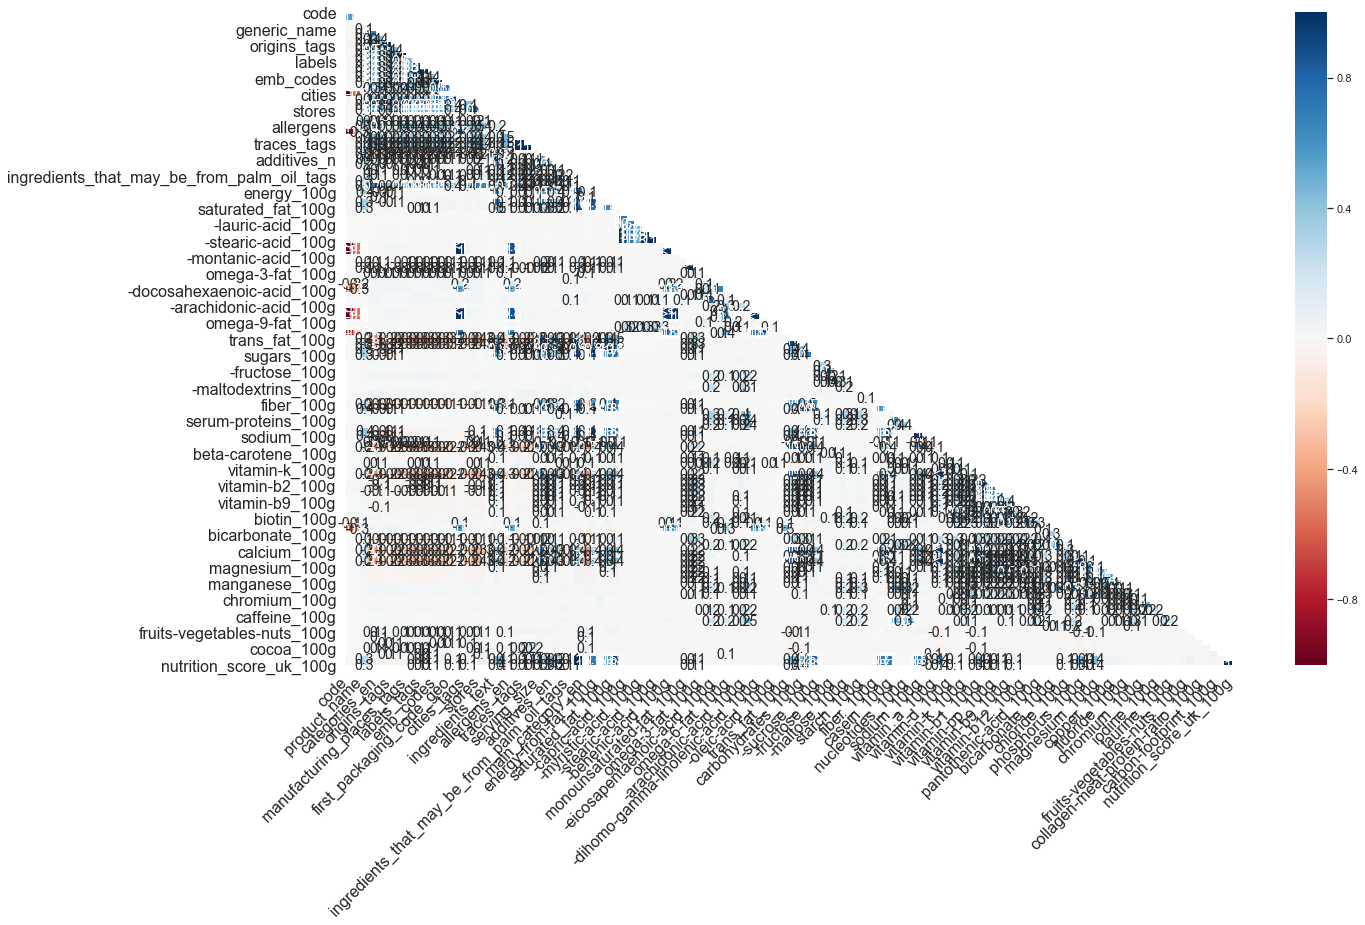

In [10]:
# Visualize the correlation between the number of missing values in different columns as a heatmap 
msno.heatmap(data) 
# It might still look messy, but it will make sense later on.

In [11]:
# We drop all columns that contain less than 20% usable data
data = data.dropna(axis=1, thresh=len(data)*0.2, how='all') 

In [12]:
# We drop all rows that only contain NaNs
data = data.dropna(axis=0, how='all') 

In [13]:
print('Rows: {}'.format(data.shape[0]) + ' \nColumns: {}'.format(data.shape[1]))

Rows: 356027 
Columns: 29


In [14]:
data.isnull().sum().sort_values()

last_modified_datetime          0
created_datetime               10
code                           26
countries_en                  275
product_name                17512
energy_100g                 60660
proteins_100g               61866
salt_100g                   66288
sodium_100g                 66333
ingredients_text            72134
additives_n                 72160
fat_100g                    76530
carbohydrates_100g          76807
sugars_100g                 76841
saturated_fat_100g          92204
nutrition_grade_fr         101171
nutrition_score_fr_100g    101171
nutrition_score_uk_100g    101171
fiber_100g                 135344
serving_size               139406
additives_en               185838
cholesterol_100g           211857
trans_fat_100g             212584
calcium_100g               214510
vitamin_c_100g             214967
iron_100g                  215367
vitamin_a_100g             218321
categories_en              252726
main_category_en           252778
dtype: int64

In the case of a real-world dataset, it is very common that some values in the dataset are missing. We represent these missing values as NaN (Not a Number) values. But to build a good machine learning model our dataset should be complete. That’s why we  we need to have a good understanding of how the NaN values are distributed in our dataset.
Missingno library offers a very nice way to visualize the distribution of NaN values.

The Heatmap shows the correlation of missingness between every 2 columns. 
- A value near -1 means if one variable appears then the other variable is very likely to be missing. 
- A value near 0 means there is no dependence between the occurrence of missing values of two variables.
- A value near 1 means if one variable appears then the other variable is very likely to be present.

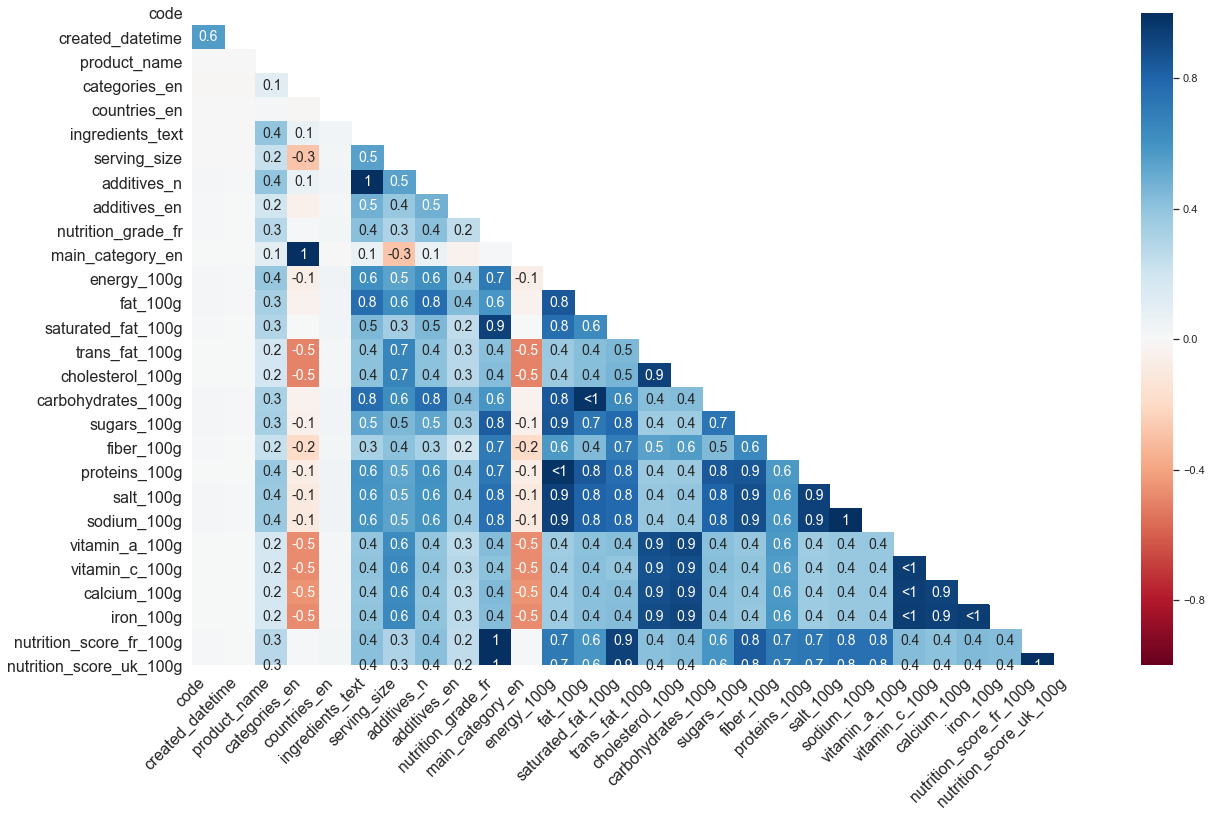

In [15]:
# Visualize the correlation between the number of missing values in different columns as a heatmap 
msno.heatmap(data) 

In [16]:
data['product_name'].fillna(value='Not available', inplace=True)

In [17]:
# We check whether there are any duplicates in our data 
data.duplicated(subset=['product_name','fat_100g','proteins_100g',
                      'carbohydrates_100g','sugars_100g','carbohydrates_100g',
                       'energy_100g','fiber_100g','sodium_100g',
                       'nutrition_grade_fr']).sum()

40082

In [18]:
data[data.duplicated(keep=False)]

,code,created_datetime,last_modified_datetime,product_name,categories_en,countries_en,ingredients_text,serving_size,additives_n,additives_en,nutrition_grade_fr,main_category_en,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin_a_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_fr_100g,nutrition_score_uk_100g


In [19]:
# We drop all duplicates from our data
data.drop_duplicates(inplace=True)

In [20]:
data.head()

,code,created_datetime,last_modified_datetime,product_name,categories_en,countries_en,ingredients_text,serving_size,additives_n,additives_en,nutrition_grade_fr,main_category_en,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin_a_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
0,0000000003087,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z,Farine de blé noir,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,NaN,d,NaN,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0
2,0000000004559,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,Peanuts,NaN,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,NaN,b,NaN,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0
3,0000000016087,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,United States,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,NaN,d,NaN,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0
4,0000000016094,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,Organic Polenta,NaN,United States,Organic polenta,35 g (0.25 cup),0.0,NaN,NaN,NaN,1552.0,1.43,NaN,NaN,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# We check the data types
data.dtypes

code                        object
created_datetime            object
last_modified_datetime      object
product_name                object
categories_en               object
countries_en                object
ingredients_text            object
serving_size                object
additives_n                float64
additives_en                object
nutrition_grade_fr          object
main_category_en            object
energy_100g                float64
fat_100g                   float64
saturated_fat_100g         float64
trans_fat_100g             float64
cholesterol_100g           float64
carbohydrates_100g         float64
sugars_100g                float64
fiber_100g                 float64
proteins_100g              float64
salt_100g                  float64
sodium_100g                float64
vitamin_a_100g             float64
vitamin_c_100g             float64
calcium_100g               float64
iron_100g                  float64
nutrition_score_fr_100g    float64
nutrition_score_uk_1

We notice we have a lot of columns with object data types, which means they need to be standardized. For now let's take care of timestamps.

In [22]:
data['created_datetime'] = pd.to_datetime(data['created_datetime'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')

In [23]:
data['last_modified_datetime'] = pd.to_datetime(data['last_modified_datetime'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')

In [24]:
data[['created_datetime', 'last_modified_datetime']].isnull().sum()

created_datetime          27
last_modified_datetime    26
dtype: int64

In [25]:
# We fill the nulls
data['created_datetime'].fillna(method='ffill', inplace=True)
data['last_modified_datetime'].fillna(method='ffill', inplace=True)

In [26]:
data.describe()

,additives_n,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin_a_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
count,283867.000000,295367.000000,2.794970e+05,263823.000000,143443.000000,144170.000000,2.792200e+05,279186.000000,2.206830e+05,2.941610e+05,289739.000000,289694.000000,137706.000000,141060.000000,141517.000000,140660.000000,254856.000000,254856.000000
mean,1.876851,1125.453320,5.606587e+04,5.092460,0.073487,0.020065,5.614020e+04,15.673428,3.843467e+05,5.326598e+04,1.941281,0.764401,0.000398,0.023394,0.127284,0.003791,9.166137,8.980656
std,2.501022,936.825952,2.963385e+07,7.965148,1.539417,0.357963,2.964854e+07,21.983635,1.805529e+08,2.888578e+07,120.545973,47.462729,0.073239,2.234928,3.349236,0.216565,8.999870,9.151757
min,0.000000,0.000000,0.000000e+00,0.000000,-3.570000,0.000000,0.000000e+00,-17.860000,-6.700000e+00,-8.000000e+02,0.000000,0.000000,-0.000340,-0.002100,0.000000,-0.000260,-15.000000,-15.000000
25%,0.000000,382.000000,1.000000e-01,0.000000,0.000000,0.000000,5.600000e+00,1.200000,0.000000e+00,7.200000e-01,0.060000,0.023622,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,1092.000000,5.290000e+00,1.790000,0.000000,0.000000,2.000000e+01,5.400000,1.500000e+00,4.880000e+00,0.558800,0.220000,0.000000,0.000000,0.036000,0.001010,10.000000,9.000000
75%,3.000000,1674.000000,2.000000e+01,7.140000,0.000000,0.020000,5.758000e+01,23.330000,3.600000e+00,1.000000e+01,1.356360,0.534000,0.000107,0.003800,0.107000,0.002400,16.000000,16.000000
max,30.000000,231199.000000,1.566667e+10,550.000000,369.000000,95.238000,1.566667e+10,3520.000000,8.481815e+10,1.566667e+10,64312.800000,25320.000000,26.700000,716.981100,694.737000,50.000000,40.000000,40.000000


In [27]:
data.dtypes

code                               object
created_datetime           datetime64[ns]
last_modified_datetime     datetime64[ns]
product_name                       object
categories_en                      object
countries_en                       object
ingredients_text                   object
serving_size                       object
additives_n                       float64
additives_en                       object
nutrition_grade_fr                 object
main_category_en                   object
energy_100g                       float64
fat_100g                          float64
saturated_fat_100g                float64
trans_fat_100g                    float64
cholesterol_100g                  float64
carbohydrates_100g                float64
sugars_100g                       float64
fiber_100g                        float64
proteins_100g                     float64
salt_100g                         float64
sodium_100g                       float64
vitamin_a_100g                    

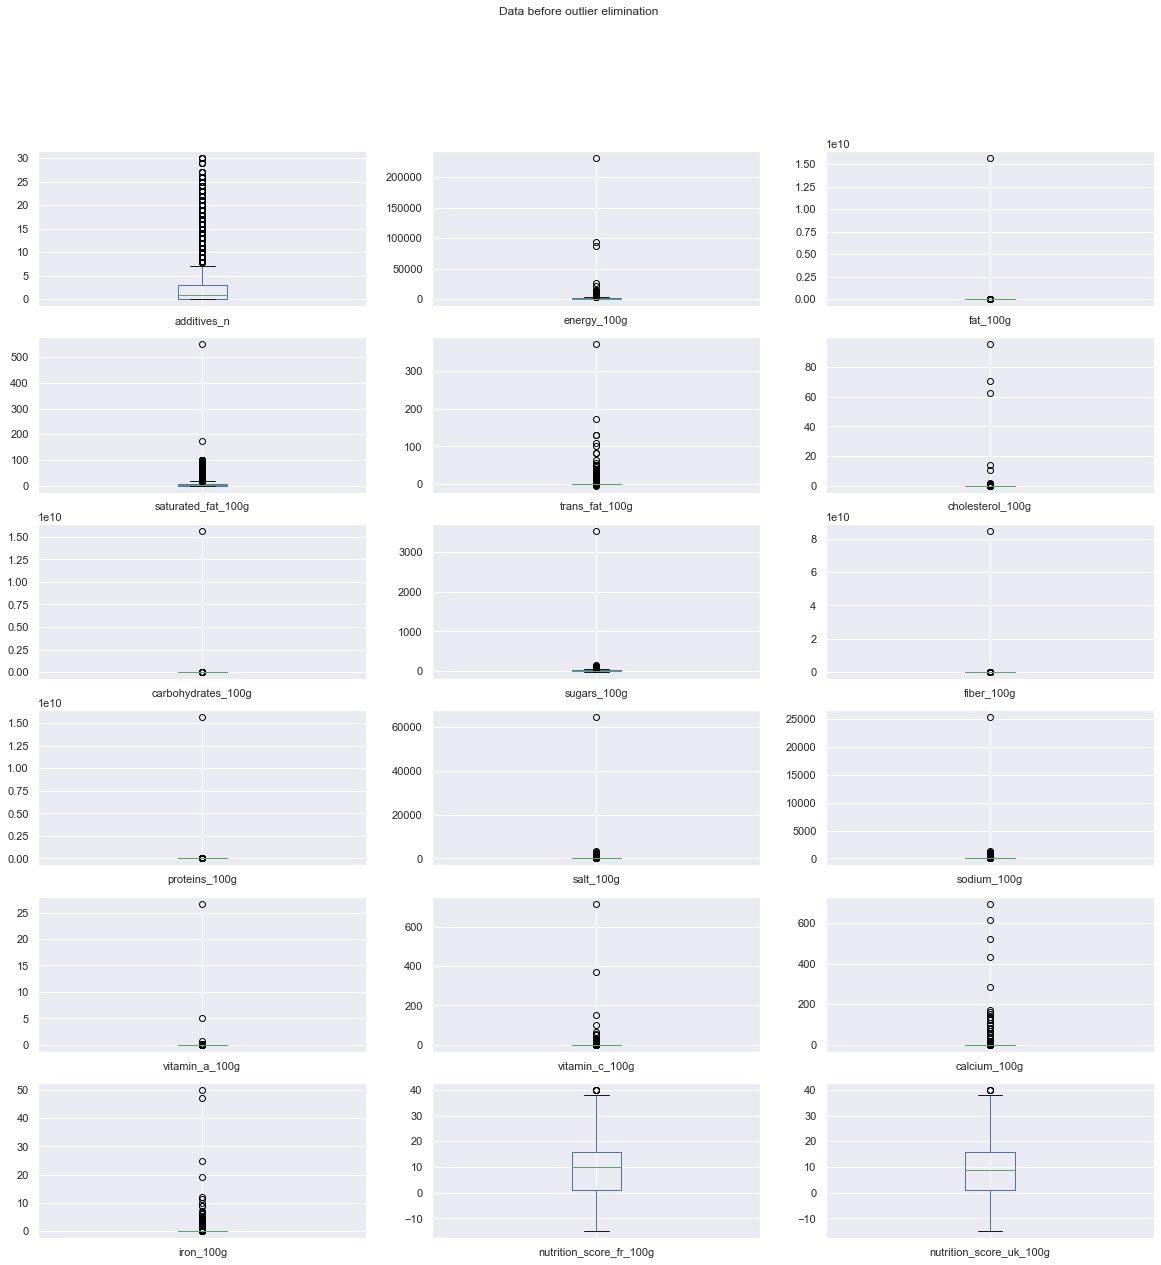

In [28]:
data.select_dtypes(include=float).plot(kind='box', subplots=True, title='Data before outlier elimination', figsize=(20,20), layout=(6,3))
plt.show()

In [29]:
data.describe()

,additives_n,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin_a_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
count,283867.000000,295367.000000,2.794970e+05,263823.000000,143443.000000,144170.000000,2.792200e+05,279186.000000,2.206830e+05,2.941610e+05,289739.000000,289694.000000,137706.000000,141060.000000,141517.000000,140660.000000,254856.000000,254856.000000
mean,1.876851,1125.453320,5.606587e+04,5.092460,0.073487,0.020065,5.614020e+04,15.673428,3.843467e+05,5.326598e+04,1.941281,0.764401,0.000398,0.023394,0.127284,0.003791,9.166137,8.980656
std,2.501022,936.825952,2.963385e+07,7.965148,1.539417,0.357963,2.964854e+07,21.983635,1.805529e+08,2.888578e+07,120.545973,47.462729,0.073239,2.234928,3.349236,0.216565,8.999870,9.151757
min,0.000000,0.000000,0.000000e+00,0.000000,-3.570000,0.000000,0.000000e+00,-17.860000,-6.700000e+00,-8.000000e+02,0.000000,0.000000,-0.000340,-0.002100,0.000000,-0.000260,-15.000000,-15.000000
25%,0.000000,382.000000,1.000000e-01,0.000000,0.000000,0.000000,5.600000e+00,1.200000,0.000000e+00,7.200000e-01,0.060000,0.023622,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,1092.000000,5.290000e+00,1.790000,0.000000,0.000000,2.000000e+01,5.400000,1.500000e+00,4.880000e+00,0.558800,0.220000,0.000000,0.000000,0.036000,0.001010,10.000000,9.000000
75%,3.000000,1674.000000,2.000000e+01,7.140000,0.000000,0.020000,5.758000e+01,23.330000,3.600000e+00,1.000000e+01,1.356360,0.534000,0.000107,0.003800,0.107000,0.002400,16.000000,16.000000
max,30.000000,231199.000000,1.566667e+10,550.000000,369.000000,95.238000,1.566667e+10,3520.000000,8.481815e+10,1.566667e+10,64312.800000,25320.000000,26.700000,716.981100,694.737000,50.000000,40.000000,40.000000


In [30]:
# Outliers Treatment
data.loc[data.energy_100g > 4000, 'energy_100g'] = 4000

data.loc[data.fat_100g > 100, 'fat_100g'] = 100
data.loc[data.fat_100g < 0, 'fat_100g'] = 0

data.loc[data.saturated_fat_100g > 100, 'saturated_fat_100g'] = 100
data.loc[data.saturated_fat_100g < 0, 'saturated_fat_100g'] = 0

data.loc[data.trans_fat_100g > 100, 'trans_fat_100g'] = 100
data.loc[data.trans_fat_100g < 0, 'trans_fat_100g'] = 0

data.loc[data.carbohydrates_100g > 100, 'carbohydrates_100g'] = 100
data.loc[data.carbohydrates_100g < 0, 'carbohydrates_100g'] = 0

data.loc[data.fiber_100g > 100, 'fiber_100g'] = 100
data.loc[data.fiber_100g < 0, 'fiber_100g'] = 0

data.loc[data.proteins_100g > 100, 'proteins_100g'] = 100
data.loc[data.proteins_100g < 0, 'proteins_100g'] = 0

data.loc[data.sugars_100g > 100, 'sugars_100g'] = 100
data.loc[data.sugars_100g < 0, 'sugars_100g'] = 0

data.loc[data.salt_100g > 100, 'salt_100g'] = 100
data.loc[data.salt_100g < 0, 'salt_100g'] = 0
data.loc[data.sodium_100g > 100, 'sodium_100g'] = 100
data.loc[data.sodium_100g < 0, 'sodium_100g'] = 0

data.loc[data.vitamin_a_100g > 100, 'vitamin_a_100g'] = 100
data.loc[data.vitamin_a_100g < 0, 'vitamin_a_100g'] = 0

data.loc[data.vitamin_c_100g > 100, 'vitamin_c_100g'] = 100
data.loc[data.vitamin_c_100g < 0, 'vitamin_c_100g'] = 0

data.loc[data.iron_100g > 100, 'iron_100g'] = 100
data.loc[data.iron_100g < 0, 'iron_100g'] = 0

data.loc[data.calcium_100g > 100, 'calcium_100g'] = 100
data.loc[data.calcium_100g < 0, 'calcium_100g'] = 0

In [31]:
data = data[(data['fat_100g'] + data['carbohydrates_100g'] + data['proteins_100g'])<=100]

In [32]:
print("Rows: {}".format(data.shape[0]))

Rows: 275384


In [33]:
data.describe()

,additives_n,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin_a_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
count,263950.000000,274946.000000,275384.000000,244689.000000,141160.000000,141707.000000,275384.00000,259893.000000,201973.000000,275384.000000,270016.000000,269986.000000,135373.000000,138605.000000,138888.000000,138222.000000,236726.000000,236726.000000
mean,1.940750,1115.442251,12.613636,5.001930,0.069109,0.020174,31.26192,15.577360,2.881725,7.074097,1.603250,0.641881,0.000400,0.013879,0.109219,0.003802,9.117756,8.933949
std,2.521664,792.493499,17.323444,7.692633,1.110042,0.361010,28.86266,20.850708,4.625600,8.161307,6.536845,2.828764,0.073867,0.490191,1.030132,0.218465,8.984986,9.136610
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,-15.000000
25%,0.000000,376.000000,0.100000,0.000000,0.000000,0.000000,5.50000,1.220000,0.000000,0.700000,0.060000,0.023622,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,1079.000000,5.000000,1.790000,0.000000,0.000000,20.00000,5.400000,1.600000,4.760000,0.570000,0.224409,0.000000,0.000000,0.036000,0.001000,10.000000,9.000000
75%,3.000000,1670.000000,20.000000,7.140000,0.000000,0.021000,57.14000,23.260000,3.600000,10.000000,1.361440,0.536000,0.000107,0.003800,0.107000,0.002400,16.000000,16.000000
max,30.000000,4000.000000,100.000000,100.000000,100.000000,95.238000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,26.700000,100.000000,100.000000,50.000000,40.000000,37.000000


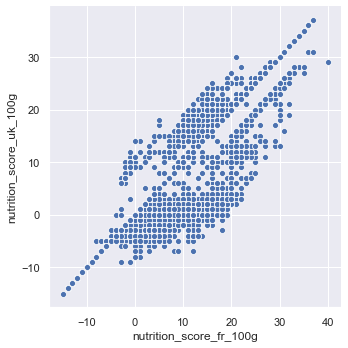

In [34]:
sns.pairplot(data, x_vars=['nutrition_score_fr_100g'], y_vars=['nutrition_score_uk_100g'], height=5)
plt.show()

We're assuming the nutrition score should be the same irrespective of the country, and that we can safely get rid of the inconsistent values. We'll create a new column nutrition-score_100g' and delete the old ones.

In [35]:
data['nutrition_score_100g'] = data['nutrition_score_uk_100g'][data['nutrition_score_uk_100g'] == data['nutrition_score_fr_100g']]

In [36]:
data = data.drop(columns=['nutrition_score_uk_100g', 'nutrition_score_fr_100g'])

In [37]:
# # We eliminate all values (outliers) that are more than 12 std's from the mean
# data = data[np.abs(data['fat_100g']-data['fat_100g'].mean())<=(12*data['fat_100g'].std())]
# data = data[np.abs(data['saturated_fat_100g']-data['saturated_fat_100g'].mean())<=(12*data['saturated_fat_100g'].std())]
# data = data[np.abs(data['trans_fat_100g']-data['trans_fat_100g'].mean())<=(12*data['trans_fat_100g'].std())]
# data = data[np.abs(data['cholesterol_100g']-data['cholesterol_100g'].mean())<=(12*data['cholesterol_100g'].std())]
# data = data[np.abs(data['carbohydrates_100g']-data['carbohydrates_100g'].mean())<=(12*data['carbohydrates_100g'].std())]
# data = data[np.abs(data['sugars_100g']-data['sugars_100g'].mean())<=(12*data['sugars_100g'].std())]
# data = data[np.abs(data['fiber_100g']-data['fiber_100g'].mean())<=(12*data['fiber_100g'].std())]
# data = data[np.abs(data['proteins_100g']-data['proteins_100g'].mean())<=(12*data['proteins_100g'].std())]
# data = data[np.abs(data['salt_100g']-data['salt_100g'].mean())<=(12*data['salt_100g'].std())]
# data = data[np.abs(data['sodium_100g']-data['sodium_100g'].mean())<=(12*data['sodium_100g'].std())]
# data = data[np.abs(data['vitamin_a_100g']-data['vitamin_a_100g'].mean())<=(12*data['vitamin_a_100g'].std())]
# data = data[np.abs(data['vitamin_c_100g']-data['vitamin_c_100g'].mean())<=(12*data['vitamin_c_100g'].std())]
# data = data[np.abs(data['calcium_100g']-data['calcium_100g'].mean())<=(12*data['calcium_100g'].std())]
# data = data[np.abs(data['iron_100g']-data['iron_100g'].mean())<=(12*data['iron_100g'].std())]

In [38]:
# print("Rows: {}".format(data.shape[0]))

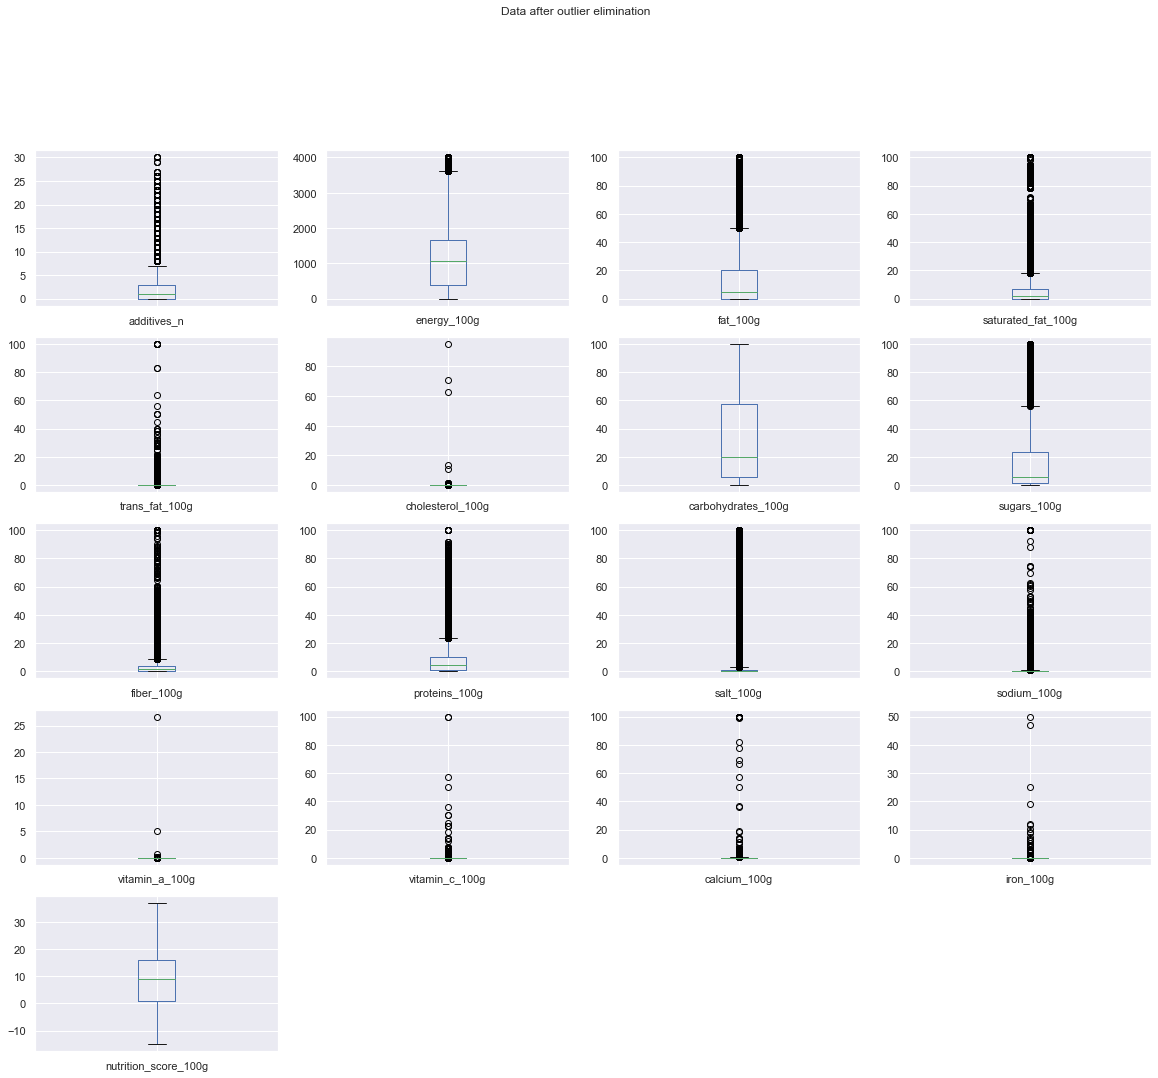

In [39]:
data.select_dtypes(include=float).plot(kind='box', subplots=True, title='Data after outlier elimination', figsize=(20,20), layout=(6,4))
plt.show()

In [40]:
data.describe()

,additives_n,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin_a_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_100g
count,263950.000000,274946.000000,275384.000000,244689.000000,141160.000000,141707.000000,275384.00000,259893.000000,201973.000000,275384.000000,270016.000000,269986.000000,135373.000000,138605.000000,138888.000000,138222.000000,224449.000000
mean,1.940750,1115.442251,12.613636,5.001930,0.069109,0.020174,31.26192,15.577360,2.881725,7.074097,1.603250,0.641881,0.000400,0.013879,0.109219,0.003802,9.004740
std,2.521664,792.493499,17.323444,7.692633,1.110042,0.361010,28.86266,20.850708,4.625600,8.161307,6.536845,2.828764,0.073867,0.490191,1.030132,0.218465,9.113698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,376.000000,0.100000,0.000000,0.000000,0.000000,5.50000,1.220000,0.000000,0.700000,0.060000,0.023622,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1079.000000,5.000000,1.790000,0.000000,0.000000,20.00000,5.400000,1.600000,4.760000,0.570000,0.224409,0.000000,0.000000,0.036000,0.001000,9.000000
75%,3.000000,1670.000000,20.000000,7.140000,0.000000,0.021000,57.14000,23.260000,3.600000,10.000000,1.361440,0.536000,0.000107,0.003800,0.107000,0.002400,16.000000
max,30.000000,4000.000000,100.000000,100.000000,100.000000,95.238000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,26.700000,100.000000,100.000000,50.000000,37.000000


### B. Manipulating the data

For task B we will work with the data to investigate some interesting properties of the data. First let's do some feature extraction.

In [41]:
# We create a new column 'time_delta' that represents the difference in time between creation and modification. We will also need this later on for task D.
data['time_delta'] = (data['last_modified_datetime'] - data['created_datetime'])

In [42]:
data.isnull().sum()

code                           0
created_datetime               0
last_modified_datetime         0
product_name                   0
categories_en             198311
countries_en                  64
ingredients_text           11434
serving_size               64311
additives_n                11434
additives_en              112334
nutrition_grade_fr         38658
main_category_en          198311
energy_100g                  438
fat_100g                       0
saturated_fat_100g         30695
trans_fat_100g            134224
cholesterol_100g          133677
carbohydrates_100g             0
sugars_100g                15491
fiber_100g                 73411
proteins_100g                  0
salt_100g                   5368
sodium_100g                 5398
vitamin_a_100g            140011
vitamin_c_100g            136779
calcium_100g              136496
iron_100g                 137162
nutrition_score_100g       50935
time_delta                     0
dtype: int64

In [43]:
data.head()

,code,created_datetime,last_modified_datetime,product_name,categories_en,countries_en,ingredients_text,serving_size,additives_n,additives_en,nutrition_grade_fr,main_category_en,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin_a_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_100g,time_delta
1,0000000004530,2017-03-09 14:32:37,2017-03-09 14:32:37,Banana Chips Sweetened (Whole),NaN,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,NaN,d,NaN,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,0 days
2,0000000004559,2017-03-09 14:32:37,2017-03-09 14:32:37,Peanuts,NaN,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,NaN,b,NaN,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0 days
3,0000000016087,2017-03-09 10:35:31,2017-03-09 10:35:31,Organic Salted Nut Mix,NaN,United States,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,NaN,d,NaN,2540.0,57.14,5.36,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,0 days
4,0000000016094,2017-03-09 10:34:13,2017-03-09 10:34:13,Organic Polenta,NaN,United States,Organic polenta,35 g (0.25 cup),0.0,NaN,NaN,NaN,1552.0,1.43,NaN,NaN,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days
5,0000000016100,2017-03-09 10:34:11,2017-03-09 10:34:11,Breadshop Honey Gone Nuts Granola,NaN,United States,"Rolled oats, grape concentrate, expeller press...",52 g (0.5 cup),0.0,NaN,NaN,NaN,1933.0,18.27,1.92,NaN,NaN,63.46,11.54,7.7,13.46,NaN,NaN,NaN,NaN,0.038,0.00346,NaN,0 days


We notice some prefixes on the categories, so we remove them for aestethical reasons.

In [44]:
data['categories_en'] = data.categories_en.str.replace('fr:?' , '')
data['categories_en'] = data.categories_en.str.replace('nl:?' , '')
data['categories_en'] = data.categories_en.str.replace('ru:?' , '')
data['categories_en'] = data.categories_en.str.replace('xx:?' , '')

In [45]:
# We split all entries in the 'categories_en' column and create a new row for each in a new dataframe
# We use the 'categories_en' column rather than th 'main_column' because there are many NaNs and this way we get more data
categories = data['categories_en'].str.split(',').apply(Series, 1).stack()
categories.index = categories.index.droplevel(-1)
categories.name = 'categories'
data_categories = data.join(categories)

In [46]:
data['countries_en'] = data.countries_en.str.replace('fr:?' , '')
data['countries_en'] = data.countries_en.str.replace('nl:?' , '')
data['countries_en'] = data.countries_en.str.replace('ru:?' , '')
data['countries_en'] = data.countries_en.str.replace('xx:?' , '')

In [47]:
# We split all entries in the 'countries_en' column and create a new row for each in a new dataframe
countries = data['countries_en'].str.split(',').apply(Series, 1).stack()
countries.index = countries.index.droplevel(-1)
countries.name = 'countries'
data_countries = data.join(countries)

In order to continue the data exploration we need to understand the data better and check the following:
- Frequencies (how are our variables distributed?)
- Characteristics (what are the characteristics of the different categories and countries?)
- Relationships (how are the variables related to each other)


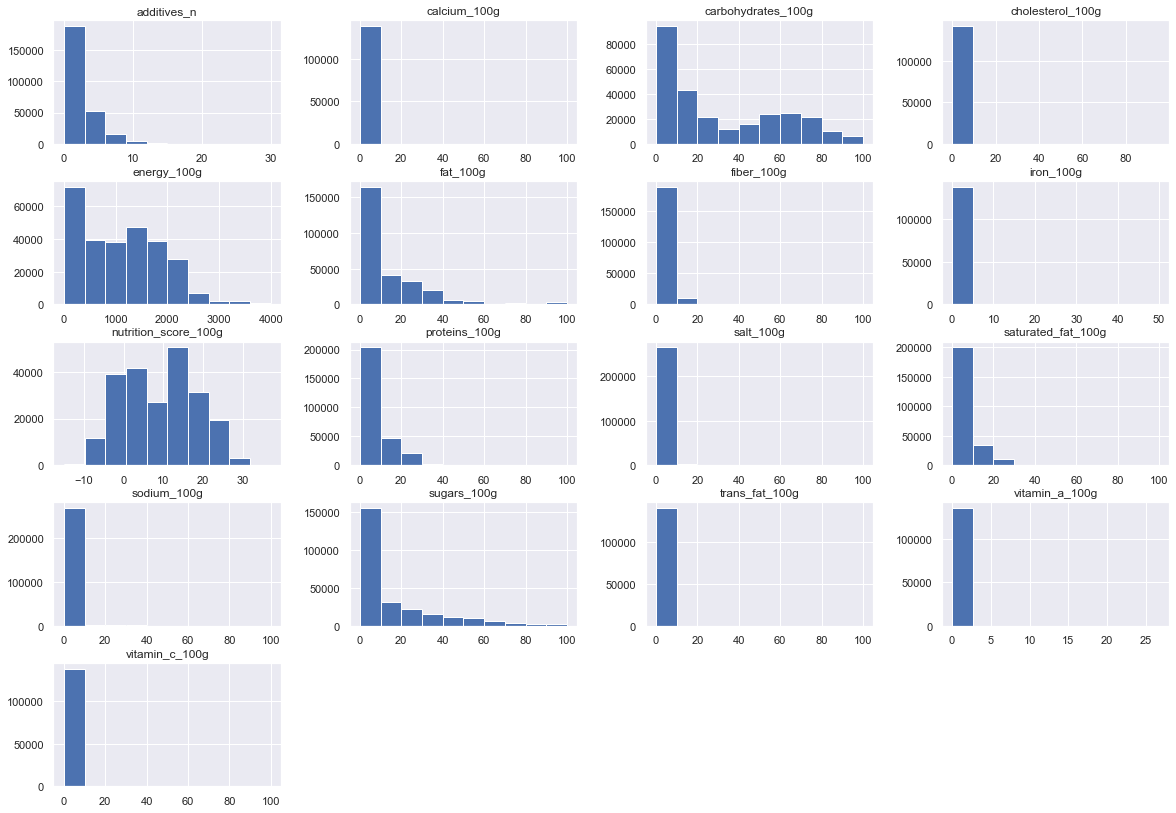

In [48]:
data.hist(figsize=(20,20), layout=(7,4))

plt.show()

We can now study the characteristics of the categories and see if we find some insights about the data.

In [49]:
data_categories.reset_index(inplace=True)

In [50]:
print("Unique categories: {}".format(data_categories['categories'].dropna().unique().shape[0]))

Unique categories: 11639


In [51]:
print('The five most common categories in our data:\n{}'.format(data_categories['categories'].value_counts().head(5)))

The five most common categories in our data:
Plant-based foods and beverages    23434
Plant-based foods                  19900
Sugary snacks                      11587
Beverages                           9981
Dairies                             9225
Name: categories, dtype: int64


In [52]:
# We exclude the categories that appear less than 10 times in our data.
categories_filtered = data_categories.groupby('categories').filter(lambda x: len(x) >= 10)

In [53]:
# We group this dataframe by their categories
categories_grouped = categories_filtered.groupby('categories')

In [54]:
categories_grouped.describe()

index                 \
                                                    count           mean   
categories                                                                 
AOC Products                                        172.0  232862.738372   
AOC cheeses                                         170.0  232627.017647   
Advent calendars                                     30.0  271540.533333   
Agave syps                                           46.0  261474.956522   
Aide-alimentaire                                     11.0  298444.363636   
...                                                   ...            ...   
Œufs de lump                                         20.0  247121.100000   
Молоко питьевое                                      65.0  287283.753846   
Молоко питьевое пастеризованное                      58.0  286621.706897   
Молоко питьевое с массовой долей жира 3.2 % уль...   21.0  286918.857143   
Молоко питьевое ультрапастеризованное                38.0  289361.421053   

                                                                            \
                                                             std       min   
categories                                                                   
AOC Products                                        45266.661496  113587.0   
AOC cheeses                                         45397.932360  113587.0   
Advent calendars                                    64746.659452   68720.0   
Agave syps                                          50658.056071  198706.0   
Aide-alimentaire                                    47782.794373  197770.0   
...                                                          ...       ...   
Œufs de lump                                        47993.794671  179272.0   
Молоко питьевое                                     23637.655009  177058.0   
Молоко питьевое пастеризованное                     24964.066022  177058.0   
Молоко питьевое с массовой долей жира 3.2 % уль...  25175.247874  177058.0   
Молоко питьевое ультрапастеризованное               18715.473000  177058.0   

                                                                         \
                                                          25%       50%   
categories                                                                
AOC Products                                        207582.50  227638.5   
AOC cheeses                                         207093.50  227632.0   
Advent calendars                                    273435.00  296085.5   
Agave syps                                          221456.75  243745.0   
Aide-alimentaire                                    266182.00  321900.0   
...                                                       ...       ...   
Œufs de lump                                        213251.75  227463.5   
Молоко питьевое                                     292036.00  292355.0   
Молоко питьевое пастеризованное                     291964.00  292298.5   
Молоко питьевое с массовой долей жира 3.2 % уль...  291985.00  292269.0   
Молоко питьевое ультрапастеризованное               291964.00  292269.5   

                                                                         \
                                                          75%       max   
categories                                                                
AOC Products                                        258405.50  345199.0   
AOC cheeses                                         257685.00  345199.0   
Advent calendars                                    298180.75  343320.0   
Agave syps                                          300822.25  343817.0   
Aide-alimentaire                                    335348.00  336441.0   
...                                                       ...       ...   
Œufs de lump                                        256781.00  344912.0   
Молоко питьевое                                     292765.00  293655.0   
Молоко питьевое па

In [55]:
fat_top = categories_grouped['fat_100g'].describe().sort_values(by='mean',ascending=False).head(10)
fat_top

,count,mean,std,min,25%,50%,75%,max
categories,,,,,,,,
Hazelnut oils,10.0,99.200000,2.529822,92.0,100.000,100.0,100.0,100.0
Walnut oils,25.0,97.760000,3.666061,92.0,92.000,100.0,100.0,100.0
Nut oils,45.0,97.302222,3.861376,91.0,92.000,100.0,100.0,100.0
Mixed vegetable oils,46.0,96.989130,5.327590,74.0,92.000,100.0,100.0,100.0
Virgin olive oils,34.0,96.644118,4.089765,91.0,92.000,100.0,100.0,100.0
Extra-virgin olive oils,240.0,96.325833,4.262545,88.0,91.575,100.0,100.0,100.0
Sesame oils,21.0,96.276190,4.183528,90.0,92.000,100.0,100.0,100.0
Sunflower oils,63.0,96.211111,9.073661,32.0,92.000,100.0,100.0,100.0
Rapeseed oils,43.0,96.020930,6.751492,61.3,92.000,100.0,100.0,100.0


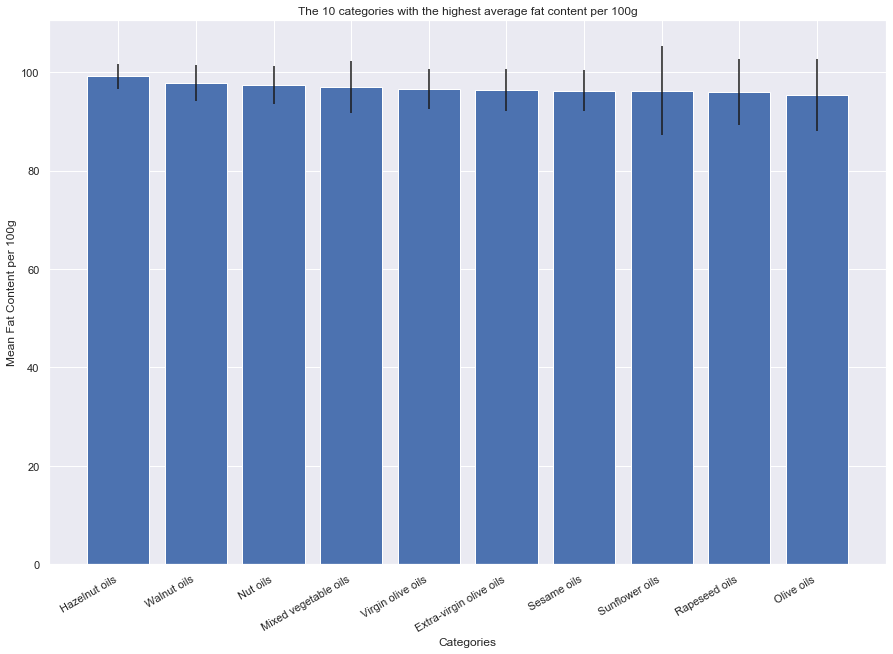

In [56]:
index = fat_top.index
mean = fat_top['mean'] 
std = fat_top['std']

plt.figure(figsize=(15,10))
x_pos = [i for i, _ in enumerate(index)]
plt.figsize=(20,10)
plt.bar(x_pos, mean, yerr=std)
plt.xlabel("Categories")
plt.ylabel("Mean Fat Content per 100g")
plt.title("The 10 categories with the highest average fat content per 100g")
plt.xticks(x_pos, index, rotation=30, horizontalalignment="right")

plt.show()

In [57]:
protein_top = categories_grouped['proteins_100g'].describe().sort_values(by='mean',ascending=False).head(10)
protein_top

,count,mean,std,min,25%,50%,75%,max
categories,,,,,,,,
Protein powders,47.0,71.035532,18.913669,6.0,64.850,78.05,82.050,88.5
Spilina,18.0,53.038778,24.761878,0.0,57.750,65.00,66.575,70.0
Textured vegetable protein,13.0,50.684615,17.367779,19.0,45.800,49.00,52.000,100.0
Bodybuilding supplements,145.0,42.259793,26.703830,0.0,20.000,35.00,69.800,88.5
Viandes-sechees,15.0,41.846667,6.388032,30.0,37.000,41.90,47.900,50.0
Nori seaweeds,10.0,39.790000,10.631238,21.0,37.750,41.50,48.425,50.4
Viande des grisons,19.0,39.626316,2.472705,32.0,38.600,40.00,40.450,43.0
Dietary supplements,214.0,36.294944,28.158213,0.0,9.775,32.00,63.000,88.5
Grana-padano,10.0,33.000000,0.000000,33.0,33.000,33.00,33.000,33.0


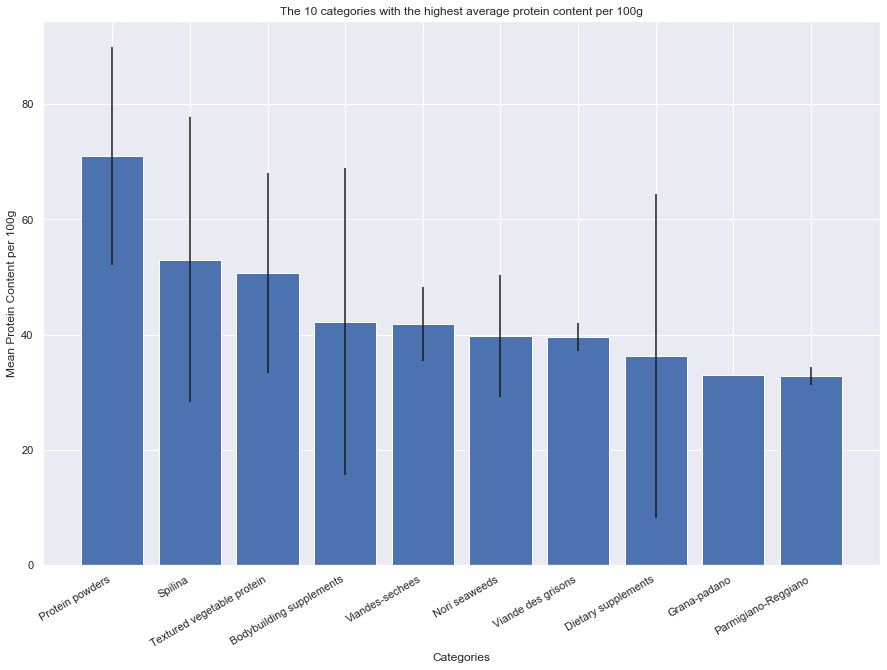

In [58]:
index = protein_top.index
mean = protein_top['mean'] 
std = protein_top['std']

plt.figure(figsize=(15,10))
x_pos = [i for i, _ in enumerate(index)]
plt.figsize=(20,10)
plt.bar(x_pos, mean, yerr=std)
plt.xlabel("Categories")
plt.ylabel("Mean Protein Content per 100g")
plt.title("The 10 categories with the highest average protein content per 100g")
plt.xticks(x_pos, index, rotation=30, horizontalalignment="right")

plt.show()

In [59]:
carbs_top = categories_grouped['carbohydrates_100g'].describe().sort_values(by='mean',ascending=False).head(10)
carbs_top

,count,mean,std,min,25%,50%,75%,max
categories,,,,,,,,
Granulated sugars,31.0,99.940323,0.272770,98.5,100.000,100.000,100.000,100.0
Powdered sugars,14.0,99.914286,0.195555,99.3,99.925,100.000,100.000,100.0
Lump sugar,24.0,99.829167,0.375881,98.6,99.975,100.000,100.000,100.0
Sucres en poudre,34.0,99.532353,1.721824,91.0,100.000,100.000,100.000,100.0
Cane sugar,60.0,96.308333,13.216583,0.0,97.400,99.500,100.000,100.0
Sugars,247.0,96.004089,11.433548,0.0,96.550,99.600,100.000,100.0
Lollipops,20.0,95.045000,3.067053,84.7,94.450,95.200,96.475,99.7
Brown sugars,25.0,94.600000,19.787328,0.0,97.400,99.000,99.700,100.0
Pastilles,14.0,90.365000,15.868573,47.0,95.000,95.155,98.275,99.0


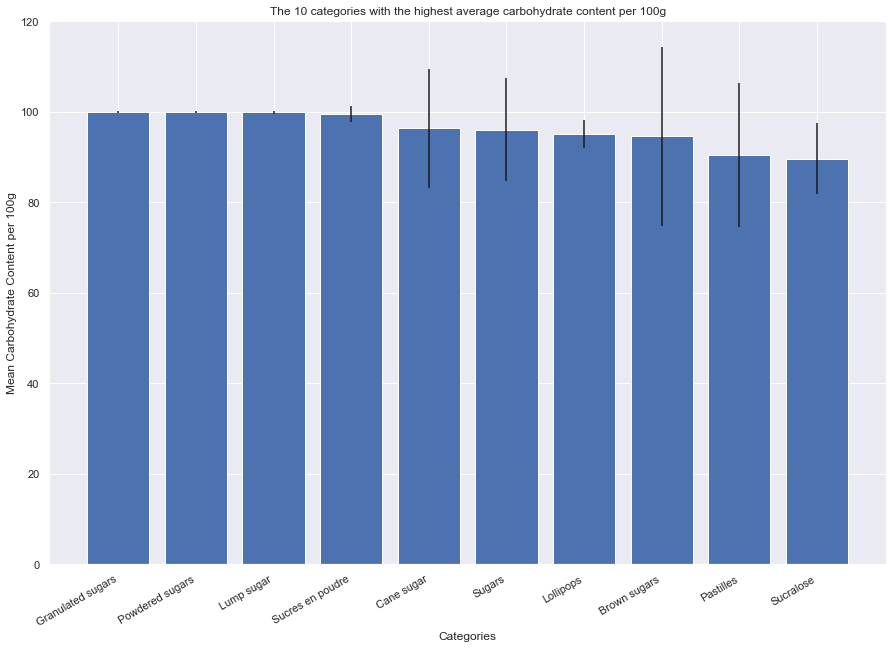

In [60]:
index = carbs_top.index
mean = carbs_top['mean'] 
std = carbs_top['std']

plt.figure(figsize=(15,10))
x_pos = [i for i, _ in enumerate(index)]
plt.figsize=(20,10)
plt.bar(x_pos, mean, yerr=std)
plt.xlabel("Categories")
plt.ylabel("Mean Carbohydrate Content per 100g")
plt.title("The 10 categories with the highest average carbohydrate content per 100g")
plt.xticks(x_pos, index, rotation=30, horizontalalignment="right")

plt.show()

In [61]:
sugar_top = categories_grouped['sugars_100g'].describe().sort_values(by='mean',ascending=False).head(10)
sugar_top

,count,mean,std,min,25%,50%,75%,max
categories,,,,,,,,
Granulated sugars,27.0,99.931481,0.291926,98.5,100.00,100.0,100.00,100.0
Lump sugar,23.0,99.826087,0.404764,98.6,100.00,100.0,100.00,100.0
Sucres en poudre,31.0,99.264516,1.956791,91.0,99.75,100.0,100.00,100.0
Powdered sugars,13.0,99.153846,1.315684,96.0,99.30,99.7,100.00,100.0
Cane sugar,58.0,95.841379,13.506464,0.0,96.70,99.4,100.00,100.0
Brown sugars,25.0,94.504000,19.775331,0.0,97.40,99.0,99.70,100.0
Sugars,232.0,93.458147,16.235795,0.0,95.00,99.0,100.00,100.0
Sucres gélifiant,12.0,87.658333,24.332674,31.7,96.50,98.0,99.00,99.8
Pate-a-sucre,10.0,84.400000,3.806427,80.0,80.00,87.0,87.00,88.0


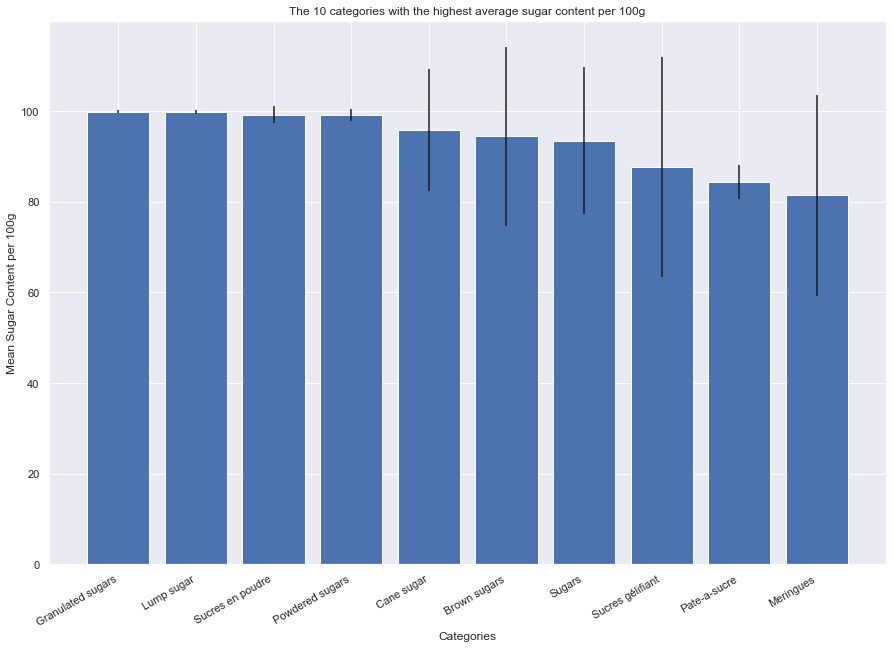

In [62]:
index = sugar_top.index
mean = sugar_top['mean'] 
std = sugar_top['std']

plt.figure(figsize=(15,10))
x_pos = [i for i, _ in enumerate(index)]
plt.figsize=(20,10)
plt.bar(x_pos, mean, yerr=std)
plt.xlabel("Categories")
plt.ylabel("Mean Sugar Content per 100g")
plt.title("The 10 categories with the highest average sugar content per 100g")
plt.xticks(x_pos, index, rotation=30, horizontalalignment="right")

plt.show()

In [63]:
un_healthy_top = categories_grouped['nutrition_score_100g'].describe().sort_values(by='mean',ascending=False).head(10)
un_healthy_top

,count,mean,std,min,25%,50%,75%,max
categories,,,,,,,,
Soupes-de-nouilles,1.0,35.000000,NaN,35.0,35.0,35.0,35.0,35.0
Salted butters,9.0,28.000000,1.224745,25.0,28.0,28.0,29.0,29.0
Half-salted butter,124.0,26.338710,1.743220,19.0,26.0,26.0,27.0,29.0
White chocolates,107.0,26.299065,1.948463,16.0,26.0,27.0,27.5,28.0
Chocolate eggs,64.0,25.828125,1.839209,16.0,25.0,26.0,27.0,28.0
Mini-saucissons-secs,9.0,25.666667,0.500000,25.0,25.0,26.0,26.0,26.0
Advent calendars,30.0,25.500000,1.995685,21.0,25.0,26.0,27.0,29.0
Easter chocolates,122.0,25.450820,2.049400,15.0,25.0,26.0,27.0,28.0
Cookies with chocolate and nougat,19.0,25.263158,2.181796,22.0,24.0,24.0,27.5,29.0


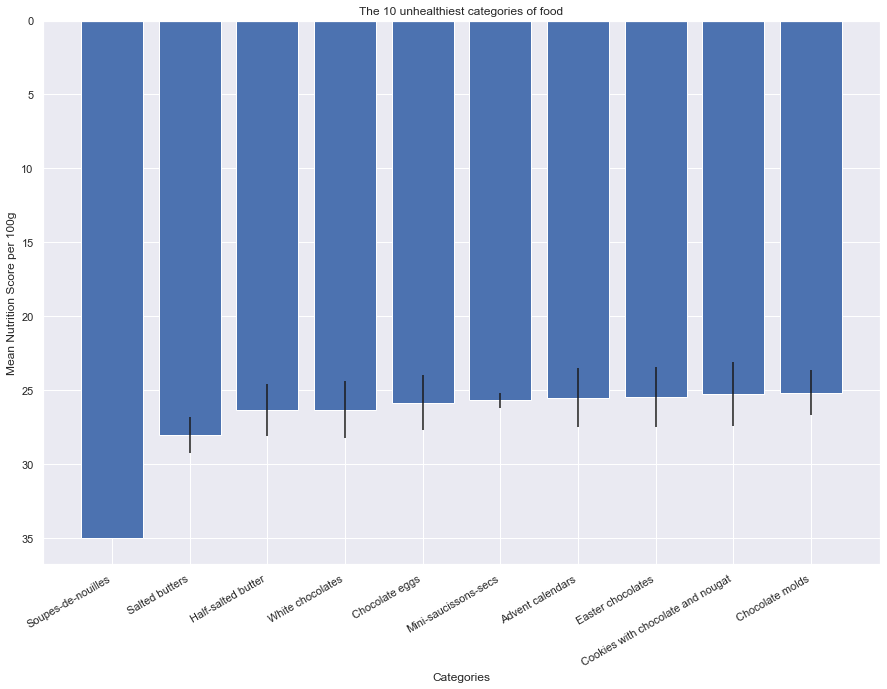

In [64]:
index = un_healthy_top.index
mean = un_healthy_top['mean'] 
std = un_healthy_top['std']

plt.figure(figsize=(15,10))
x_pos = [i for i, _ in enumerate(index)]
plt.figsize=(20,10)
plt.bar(x_pos, mean, yerr=std)
plt.xlabel("Categories")
plt.ylabel("Mean Nutrition Score per 100g")
plt.title("The 10 unhealthiest categories of food")
plt.xticks(x_pos, index, rotation=30, horizontalalignment="right")
plt.gca().invert_yaxis()

plt.show()

In [65]:
healthy_top = categories_grouped['nutrition_score_100g'].describe().sort_values(by='mean',ascending=True).head(10)
healthy_top

,count,mean,std,min,25%,50%,75%,max
categories,,,,,,,,
Frozen esh broad beans,10.0,-12.200000,1.873796,-13.0,-13.0,-13.0,-12.25,-7.0
Frozen green peas,20.0,-11.300000,2.105132,-13.0,-13.0,-12.0,-10.75,-6.0
Frozen artichokes,11.0,-10.636364,1.361817,-12.0,-11.0,-11.0,-11.00,-8.0
Frozen flat green beans,9.0,-10.555556,1.013794,-12.0,-11.0,-11.0,-10.00,-9.0
Frozen legumes,83.0,-10.325301,2.369051,-14.0,-12.0,-11.0,-9.00,-2.0
Petits-pois,11.0,-10.090909,3.144982,-13.0,-12.0,-10.0,-9.50,-2.0
Frozen green beans,46.0,-10.021739,1.468017,-12.0,-11.0,-11.0,-9.00,-6.0
Frozen chopped green beans,14.0,-9.714286,1.138729,-11.0,-11.0,-9.5,-9.00,-8.0
Frozen broccoli florets,21.0,-9.428571,1.398979,-12.0,-10.0,-10.0,-9.00,-5.0


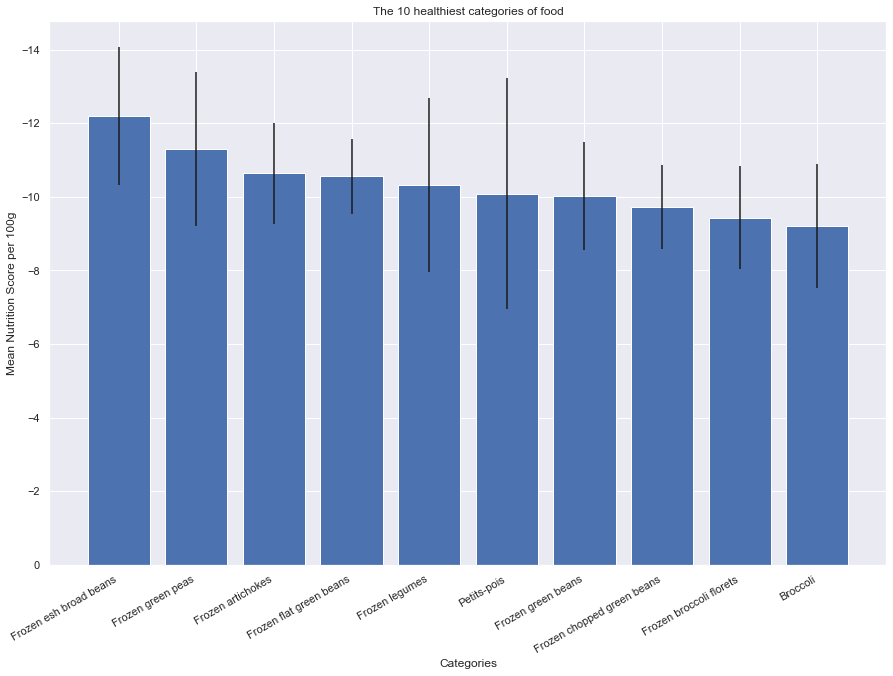

In [66]:
index = healthy_top.index
mean = healthy_top['mean'] 
std = healthy_top['std']

plt.figure(figsize=(15,10))
x_pos = [i for i, _ in enumerate(index)]
plt.figsize=(20,10)
plt.bar(x_pos, mean, yerr=std)
plt.xlabel("Categories")
plt.ylabel("Mean Nutrition Score per 100g")
plt.title("The 10 healthiest categories of food")
plt.xticks(x_pos, index, rotation=30, horizontalalignment="right")
plt.gca().invert_yaxis()

plt.show()

We will now try to see what the data looks like if we focus on the specifics of the different countries.

In [67]:
print("Unique countries: {}".format(data_countries['countries'].dropna().unique().shape[0]))

Unique countries: 164


In [68]:
print('How often each country appears in the data: \n{}'.format(data_countries['countries'].value_counts())) 

How often each country appears in the data: 
United States    169047
France            80358
Switzerland       12607
Germany            5818
Spain              3560
                  ...  
Sint Maarten          1
Danemark              1
Macau                 1
Frankrijk             1
Alemania              1
Name: countries, Length: 164, dtype: int64


In [69]:
# We will focus on the United States, France, Switzerland, Germany and Spain since there is just not enough data for all the other countries
data_countries = data_countries[(data_countries['countries']=='United States')|
                                        (data_countries['countries']=='France')|
                                        (data_countries['countries']=='Switzerland')|
                                        (data_countries['countries']=='Germany')|
                                        (data_countries['countries']=='Spain')]

In [70]:
countries_grouped = data_countries.groupby('countries')

In [71]:
countries_grouped.describe()

additives_n                                                \
                    count      mean       std  min  25%  50%  75%   max   
countries                                                                 
France            75328.0  1.800937  2.493083  0.0  0.0  1.0  3.0  30.0   
Germany            5189.0  0.975525  1.700939  0.0  0.0  0.0  1.0  18.0   
Spain              3434.0  1.264415  1.825150  0.0  0.0  1.0  2.0  14.0   
Switzerland        8660.0  1.754965  2.345984  0.0  0.0  1.0  3.0  20.0   
United States    168559.0  2.064814  2.567162  0.0  0.0  1.0  3.0  30.0   

              energy_100g                                                \
                    count         mean         std  min    25%      50%   
countries                                                                 
France            80313.0  1106.097226  777.960748  0.0  420.0  1025.00   
Germany            5811.0  1206.595577  814.702122  0.0  427.0  1186.00   
Spain              3550.0  1070.199900  867.594634  0.0  268.0   839.61   
Switzerland       12569.0  1136.754864  787.211775  0.0  420.0  1040.00   
United States    168872.0  1119.488528  797.428872  0.0  356.0  1125.00   

                                 fat_100g                                  \
                    75%     max     count       mean        std  min  25%   
countries                                                                   
France         1644.000  4000.0   80358.0  13.152972  16.925018  0.0  1.0   
Germany        1781.000  3853.0    5818.0  15.631252  18.252126  0.0  1.4   
Spain          1823.675  3971.0    3560.0  13.079785  18.495938  0.0  0.5   
Switzerland    1690.000  4000.0   12607.0  13.366209  16.764655  0.0  1.0   
United States  1674.000  4000.0  169047.0  12.209020  17.455882  0.0  0.0   

                                 saturated_fat_100g                           \
               50%    75%    max              count      mean       std  min   
countries                                                                      
France         6.7  20.80  100.0            78607.0  5.122010  7.941304  0.0   
Germany        8.4  26.00  100.0             5611.0  6.959842  9.490207  0.0   
Spain          3.6  21.00  100.0             3111.0  4.061241  6.907601  0.0   
Switzerland    6.5  21.00  100.0            11249.0  5.767186  8.143611  0.0   
United States  4.0  19.64  100.0           143292.0  4.835068  7.421873  0.0   

                                          trans_fat_100g                      \
                  25%   50%    75%    max          count      mean       std   
countries                                                                      
France         0.3000  1.90   7.00  100.0          476.0  0.150605  0.446383   
Germany        0.3315  2.70  11.20   99.0           24.0  0.108333  0.214510   
Spain          0.1000  0.70   4.30   57.2           15.0  0.028000  0.058943   
Switzerland    0.5000  2.00   8.70   98.0           35.0  0.043429  0.171874   
United States  0.0000  1.76   7.14  100.0       140499.0  0.068592  1.112044   

                                            cholesterol_100g            \
               min  25%  50%    75%     max            count      mean   
countries                                                                
France         0.0  0.0  0.0  0.100    7.14            457.0  0.036180   
Germany        0.0  0.0  0.0  0.125    1.00             21.0  0.011857   
Spain          0.0  0.0  0.0  0.010    0.20            161.0  0.000314   
Switzerland    0.0  0.0  0.0  0.000    1.00             46.0  0.020052   
United States  0.0  0.0  0.0  0.000  100.00         140945.0  0.020148   

                                                         carbohydrates_100g  \
                    std  min  25%  50%      75%      max              count   
countries                                                                     
France         0.510468  0.0  0.0  0.0  0.00159  10.9000            80358.0   
Germ

In [72]:
country_fat_top = countries_grouped['fat_100g'].describe().sort_values(by='mean',ascending=False).head(10)
country_fat_top

,count,mean,std,min,25%,50%,75%,max
countries,,,,,,,,
Germany,5818.0,15.631252,18.252126,0.0,1.4,8.4,26.00,100.0
Switzerland,12607.0,13.366209,16.764655,0.0,1.0,6.5,21.00,100.0
France,80358.0,13.152972,16.925018,0.0,1.0,6.7,20.80,100.0
Spain,3560.0,13.079785,18.495938,0.0,0.5,3.6,21.00,100.0
United States,169047.0,12.209020,17.455882,0.0,0.0,4.0,19.64,100.0


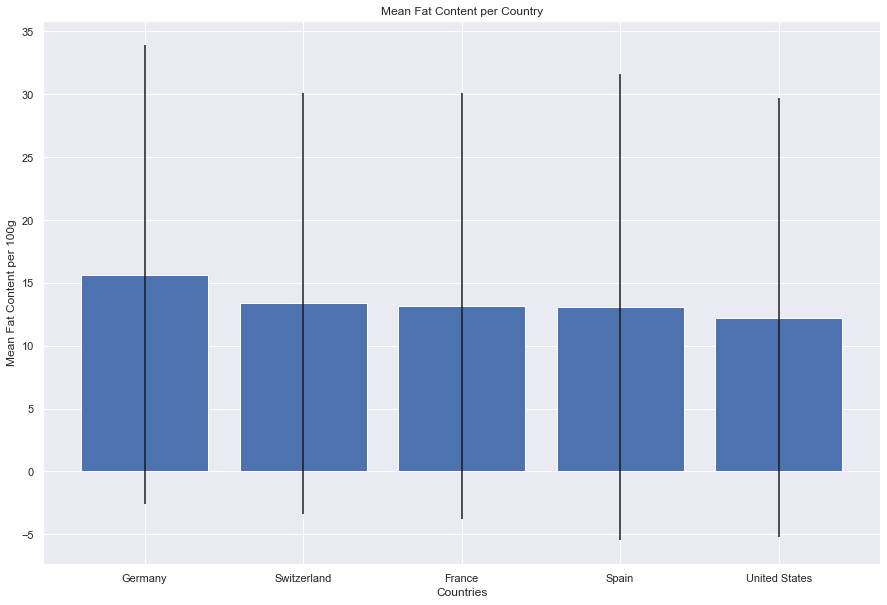

In [73]:
index = country_fat_top.index
mean = country_fat_top['mean'] 
std = country_fat_top['std']

plt.figure(figsize=(15,10))
x_pos = [i for i, _ in enumerate(index)]
plt.figsize=(20,10)
plt.bar(x_pos, mean, yerr=std)
plt.xlabel("Countries")
plt.ylabel("Mean Fat Content per 100g")
plt.title("Mean Fat Content per Country")
plt.xticks(x_pos, index)

plt.show()

In [74]:
country_carbs_top = countries_grouped['carbohydrates_100g'].describe().sort_values(by='mean',ascending=False).head(10)
country_carbs_top

,count,mean,std,min,25%,50%,75%,max
countries,,,,,,,,
United States,169047.0,33.389980,29.598699,0.0,6.67,22.91,60.000,100.0
Switzerland,12607.0,30.218415,27.028095,0.0,5.60,20.00,54.000,100.0
Spain,3560.0,27.691848,26.259870,0.0,5.40,14.52,50.925,98.2
France,80358.0,27.666499,27.393268,0.0,4.00,14.50,53.000,100.0
Germany,5818.0,27.621153,26.928788,0.0,4.20,14.40,52.275,100.0


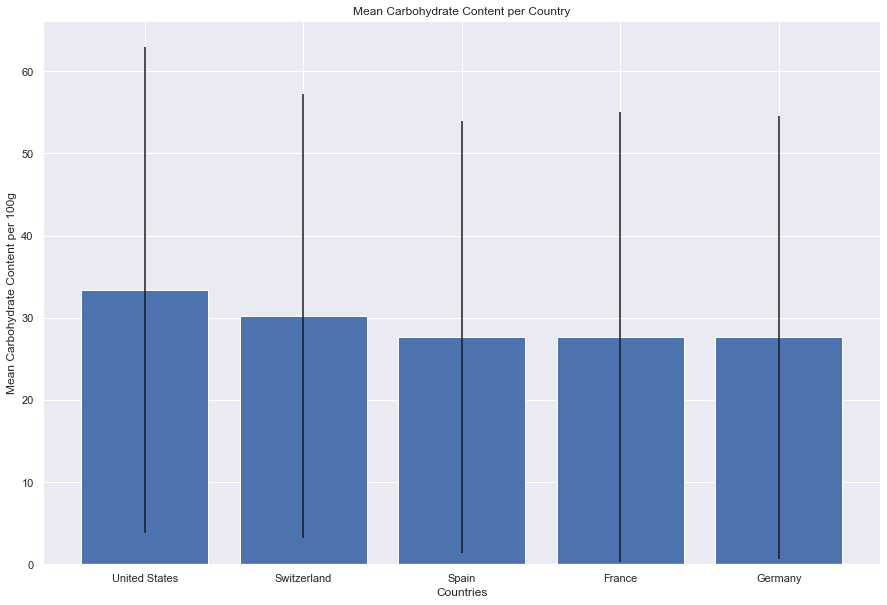

In [75]:
index = country_carbs_top.index
mean = country_carbs_top['mean'] 
std = country_carbs_top['std']

plt.figure(figsize=(15,10))
x_pos = [i for i, _ in enumerate(index)]
plt.figsize=(20,10)
plt.bar(x_pos, mean, yerr=std)
plt.xlabel("Countries")
plt.ylabel("Mean Carbohydrate Content per 100g")
plt.title("Mean Carbohydrate Content per Country")
plt.xticks(x_pos, index)

plt.show()

In [76]:
country_protein_top = countries_grouped['proteins_100g'].describe().sort_values(by='mean',ascending=False).head(10)
country_protein_top

,count,mean,std,min,25%,50%,75%,max
countries,,,,,,,,
Germany,5818.0,8.481028,9.453986,0.0,2.5000,6.20,11.0,88.5
France,80358.0,7.726414,8.161440,0.0,1.5000,5.90,11.0,100.0
Switzerland,12607.0,6.989129,7.206219,0.0,1.5000,5.20,9.5,92.0
United States,169047.0,6.751990,8.206927,0.0,0.0000,3.86,10.0,100.0
Spain,3560.0,6.014269,6.619874,0.0,1.2075,4.00,8.0,64.9


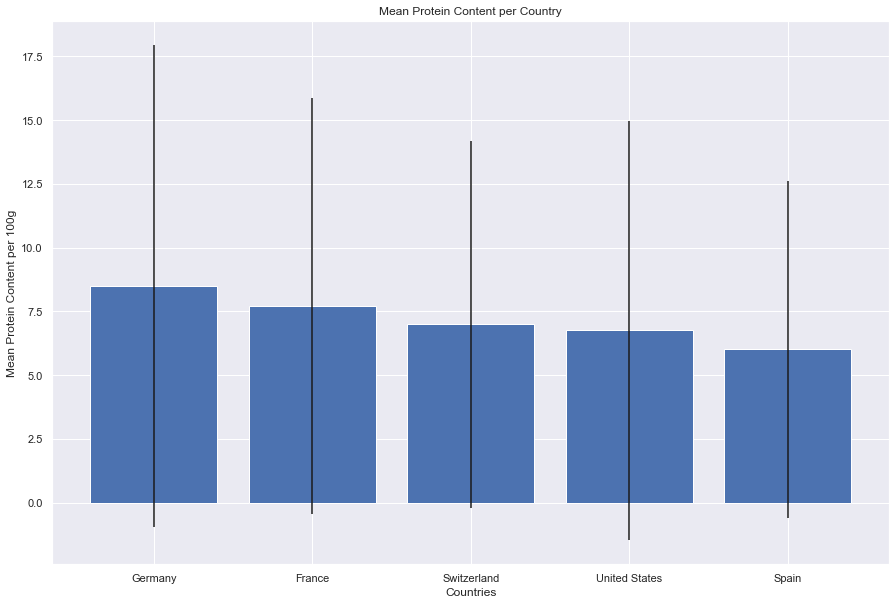

In [77]:
index = country_protein_top.index
mean = country_protein_top['mean'] 
std = country_protein_top['std']

plt.figure(figsize=(15,10))
x_pos = [i for i, _ in enumerate(index)]
plt.figsize=(20,10)
plt.bar(x_pos, mean, yerr=std)
plt.xlabel("Countries")
plt.ylabel("Mean Protein Content per 100g")
plt.title("Mean Protein Content per Country")
plt.xticks(x_pos, index)

plt.show()

In [78]:
country_sugar_top = countries_grouped['sugars_100g'].describe().sort_values(by='mean',ascending=False).head(10)
country_sugar_top

,count,mean,std,min,25%,50%,75%,max
countries,,,,,,,,
United States,158044.0,17.008939,21.881002,0.0,1.67,6.67,25.71,100.0
Switzerland,11739.0,15.674842,20.159259,0.0,1.50,5.00,24.00,100.0
Germany,5640.0,14.756998,19.806936,0.0,1.40,4.80,21.00,100.0
France,78610.0,13.055521,18.715620,0.0,1.00,4.00,17.00,100.0
Spain,3093.0,12.687118,17.864134,0.0,1.00,3.90,17.90,98.2


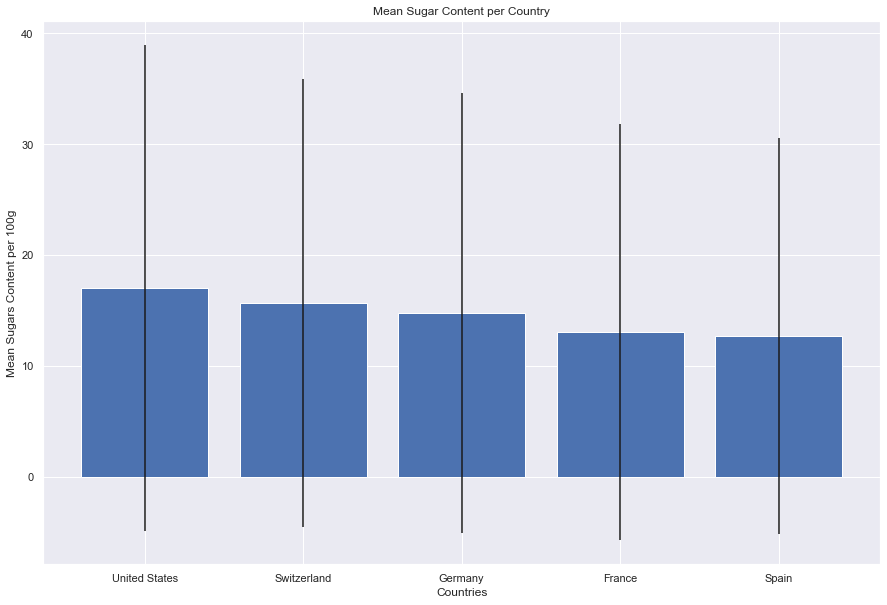

In [79]:
index = country_sugar_top.index
mean = country_sugar_top['mean'] 
std = country_sugar_top['std']

plt.figure(figsize=(15,10))
x_pos = [i for i, _ in enumerate(index)]
plt.figsize=(20,10)
plt.bar(x_pos, mean, yerr=std)
plt.xlabel("Countries")
plt.ylabel("Mean Sugars Content per 100g")
plt.title("Mean Sugar Content per Country")
plt.xticks(x_pos, index)

plt.show()

In [80]:
country_healthy_top = countries_grouped['nutrition_score_100g'].describe().sort_values(by='mean',ascending=True).head(10)
country_healthy_top

,count,mean,std,min,25%,50%,75%,max
countries,,,,,,,,
Spain,2817.0,5.977281,9.253465,-14.0,-1.0,4.0,13.0,29.0
France,67110.0,8.447400,9.212208,-15.0,1.0,8.0,16.0,37.0
Switzerland,10178.0,9.243368,9.305447,-11.0,1.0,9.0,17.0,36.0
United States,137256.0,9.361361,8.992151,-10.0,1.0,10.0,16.0,36.0
Germany,4636.0,9.426230,10.260467,-13.0,1.0,8.0,18.0,33.0


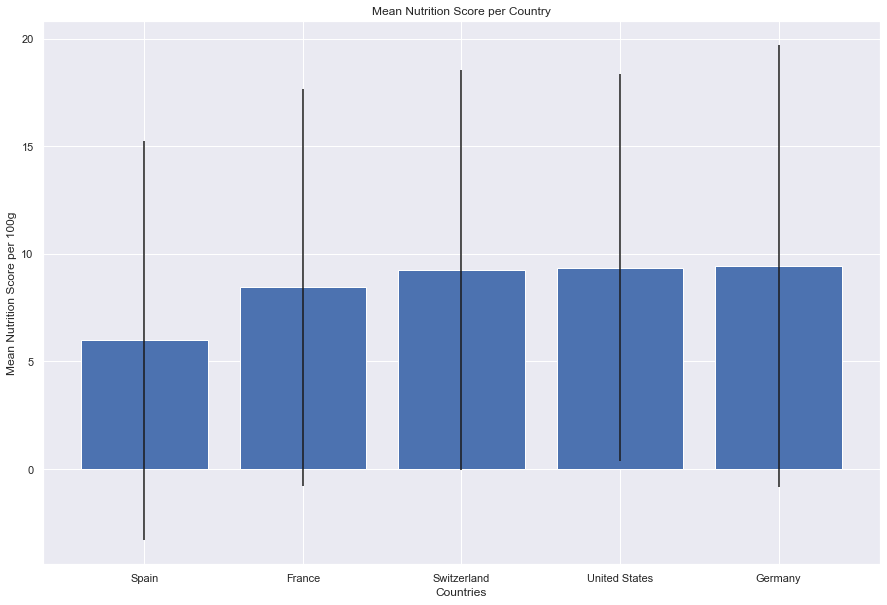

In [81]:
index = country_healthy_top.index
mean = country_healthy_top['mean'] 
std = country_healthy_top['std']

plt.figure(figsize=(15,10))
x_pos = [i for i, _ in enumerate(index)]
plt.figsize=(20,10)
plt.bar(x_pos, mean, yerr=std)
plt.xlabel("Countries")
plt.ylabel("Mean Nutrition Score per 100g")
plt.title("Mean Nutrition Score per Country")
plt.xticks(x_pos, index)

plt.show()

### C. Text data
We filter and group your data based on the ingredients_text column. The goal is to find the five most common ingredients.

Convert ingredients to lowercase. This way, e.g., salt and SALT will be counted together.

In [82]:
data = data.applymap(lambda s:s.lower() if isinstance(s, str) else s)
data['ingredients_text']

1         bananas, vegetable oil (coconut oil, corn oil ...
2         peanuts, wheat flour, sugar, rice flour, tapio...
3         organic hazelnuts, organic cashews, organic wa...
4                                           organic polenta
5         rolled oats, grape concentrate, expeller press...
                                ...                        
356004    water, high fructose corn syrup, contains 2% o...
356005                                                  NaN
356017    thé vert, arôme naturel bergamote avec autres ...
356022    organic peppermint, organic lemon grass, organ...
356026    citric acid, maltodextrin, instant tea, aspart...
Name: ingredients_text, Length: 275384, dtype: object

Replace separators (and, and/or, et, …) and special characters  between ingredients by a comma so we can later split the ingredients on the commas.

In [83]:
data['ingredients_text'] = data.ingredients_text.str.replace(' and ?' , ',')
data['ingredients_text'] = data.ingredients_text.str.replace(' et ?' , ',')
data['ingredients_text'] = data.ingredients_text.str.replace(' and/?' , ',')
data['ingredients_text'] = data.ingredients_text.str.replace('/or ?' , ',')
data['ingredients_text']

1         bananas, vegetable oil (coconut oil, corn oil,...
2         peanuts, wheat flour, sugar, rice flour, tapio...
3         organic hazelnuts, organic cashews, organic wa...
4                                           organic polenta
5         rolled oats, grape concentrate, expeller press...
                                ...                        
356004    water, high fructose corn syrup, contains 2% o...
356005                                                  NaN
356017    thé vert, arôme naturel bergamote avec autres ...
356022    organic peppermint, organic lemon grass, organ...
356026    citric acid, maltodextrin, instant tea, aspart...
Name: ingredients_text, Length: 275384, dtype: object

In [84]:
data['ingredients_text'] = data.ingredients_text.str.replace(r"[\"\'\(\)\[\]\{\}\•\…\-\:\?\&\*]", ',')
data['ingredients_text']

1         bananas, vegetable oil ,coconut oil, corn oil,...
2         peanuts, wheat flour, sugar, rice flour, tapio...
3         organic hazelnuts, organic cashews, organic wa...
4                                           organic polenta
5         rolled oats, grape concentrate, expeller press...
                                ...                        
356004    water, high fructose corn syrup, contains 2% o...
356005                                                  NaN
356017    thé vert, arôme naturel bergamote avec autres ...
356022    organic peppermint, organic lemon grass, organ...
356026    citric acid, maltodextrin, instant tea, aspart...
Name: ingredients_text, Length: 275384, dtype: object

In [85]:
# Strip leading and trailing whitespace from words
data['ingredients_text'] = data.ingredients_text.str.strip()
data['ingredients_text']

1         bananas, vegetable oil ,coconut oil, corn oil,...
2         peanuts, wheat flour, sugar, rice flour, tapio...
3         organic hazelnuts, organic cashews, organic wa...
4                                           organic polenta
5         rolled oats, grape concentrate, expeller press...
                                ...                        
356004    water, high fructose corn syrup, contains 2% o...
356005                                                  NaN
356017    thé vert, arôme naturel bergamote avec autres ...
356022    organic peppermint, organic lemon grass, organ...
356026    citric acid, maltodextrin, instant tea, aspart...
Name: ingredients_text, Length: 275384, dtype: object

In [86]:
# Remove whitespaces between two commas and double commas
# This part is probably no longer necessary, it was an early attempt
data['ingredients_text'] = data.ingredients_text.str.replace(', ,', ',')
data['ingredients_text'] = data.ingredients_text.str.replace(',,', ',')
data['ingredients_text'] = data.ingredients_text.str.replace(' ,', ', ')
data['ingredients_text']

1         bananas, vegetable oil, coconut oil, corn oil,...
2         peanuts, wheat flour, sugar, rice flour, tapio...
3         organic hazelnuts, organic cashews, organic wa...
4                                           organic polenta
5         rolled oats, grape concentrate, expeller press...
                                ...                        
356004    water, high fructose corn syrup, contains 2% o...
356005                                                  NaN
356017    thé vert, arôme naturel bergamote avec autres ...
356022    organic peppermint, organic lemon grass, organ...
356026    citric acid, maltodextrin, instant tea, aspart...
Name: ingredients_text, Length: 275384, dtype: object

In [87]:
# We split all entries in the 'ingredients_text' column and create a new row for each in a new dataframe. 
ingredients = data['ingredients_text'].str.split(',').apply(Series, 1).stack()
ingredients.index = ingredients.index.droplevel(-1)
ingredients.name = 'ingredients'
data_ingredients = data.join(ingredients)

In [88]:
# data_ingredients.isnull().sum().sort_values()

In [89]:
# data_ingredients.dropna(subset=['ingredients'], inplace=True)

In [90]:
# data_ingredients.isnull().sum().sort_values()

In [91]:
print('Unique ingredients: {}'.format(data_ingredients['ingredients'].dropna().unique().shape[0]))

Unique ingredients: 424555


In [92]:
data_ingredients = data_ingredients[data_ingredients.ingredients != '']

In [93]:
print('The five most common ingredients in the data:\n{}'.format(data_ingredients['ingredients'].dropna().value_counts().head(5)))

The five most common ingredients in the data:
 salt     98015
 sugar    66018
 water    62422
 sel      43206
 sucre    31799
Name: ingredients, dtype: int64


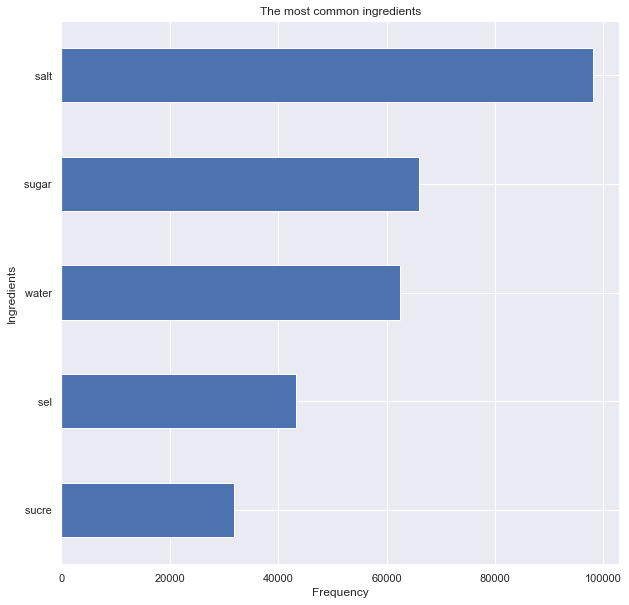

In [94]:
data_ingredients['ingredients'].dropna().value_counts().head(5).sort_values().plot(kind='barh', figsize=(10,10))
plt.xlabel('Frequency')
plt.ylabel('Ingredients')
plt.title('The most common ingredients')

plt.show()

### D. Time-series analysis
We will now investigate more closely the created_datetime and last_modified_datetime. First, we will analyze the mean time difference between these two values. And second, we will analyze the total number of items created each month over the full timeline of the data. 

In [95]:
data.reset_index(inplace=True)

In [96]:
data.set_index('created_datetime', inplace=True)

In [97]:
data['time_delta'].describe()

count                      275384
mean     102 days 08:38:50.853375
std      284 days 23:45:21.754877
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:01
75%        1 days 00:09:43.500000
max            2033 days 13:40:59
Name: time_delta, dtype: object

In [98]:
print('The mean difference between the time an entry was created and modified is {} days'.format(data['time_delta'].mean().days))

The mean difference between the time an entry was created and modified is 102 days


In [99]:
products_per_months = data['product_name'].groupby(data.index.month)

In [100]:
products_per_months.describe()

,count,unique,top,freq
created_datetime,,,,
1,5678,5273,not available,69
2,15903,12375,not available,2294
3,174064,117788,ice cream,408
4,11391,10229,not available,108
5,11004,10179,not available,60
6,10151,9339,not available,88
7,9314,8632,not available,96
8,11468,10553,not available,137
9,10101,9282,not available,72


In [101]:
# We resample our data 
products_per_month = (data.resample('M')['product_name'].count())

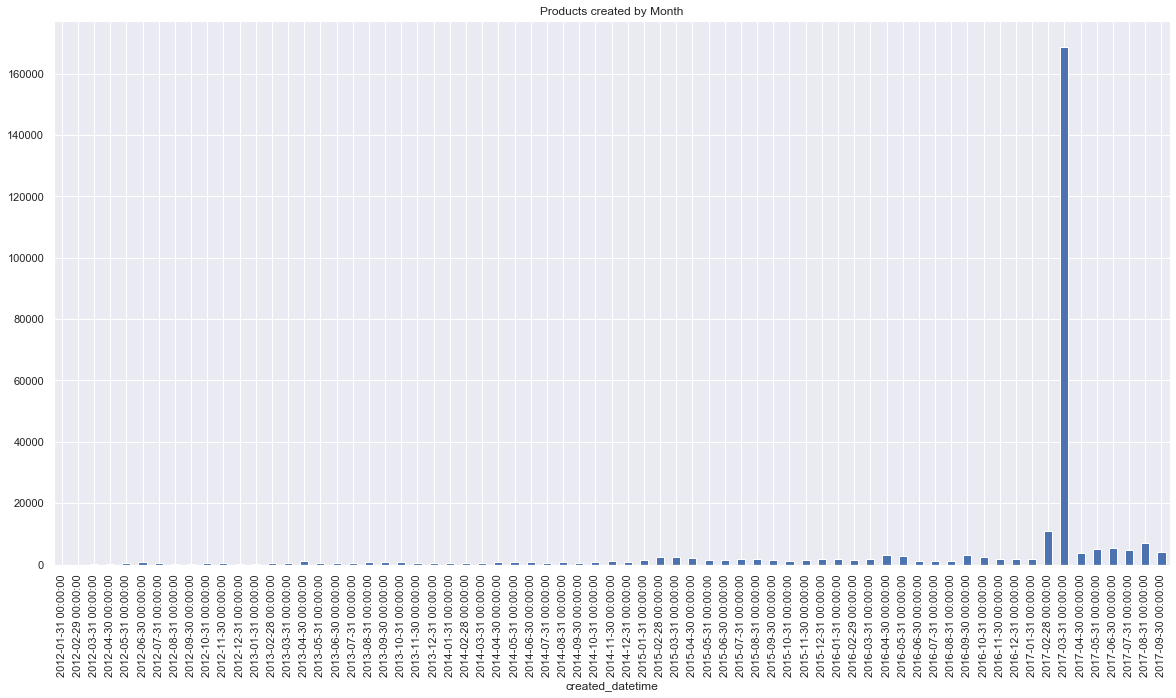

In [102]:
# Amount of products created each month
products_per_month.plot(kind='bar', figsize=(20,10), title='Products created by Month')

plt.show()

We can see that the vast majority of our entries in our data were made on the same date.

In [103]:
mean_products_per_month = products_per_month.groupby(products_per_month.index.month).mean()
mean_products_per_month

created_datetime
1       946.333333
2      2650.500000
3     29010.666667
4      1898.500000
5      1834.000000
6      1691.833333
7      1552.333333
8      1911.333333
9      1683.500000
10     1111.400000
11     1069.800000
12     1080.800000
Name: product_name, dtype: float64

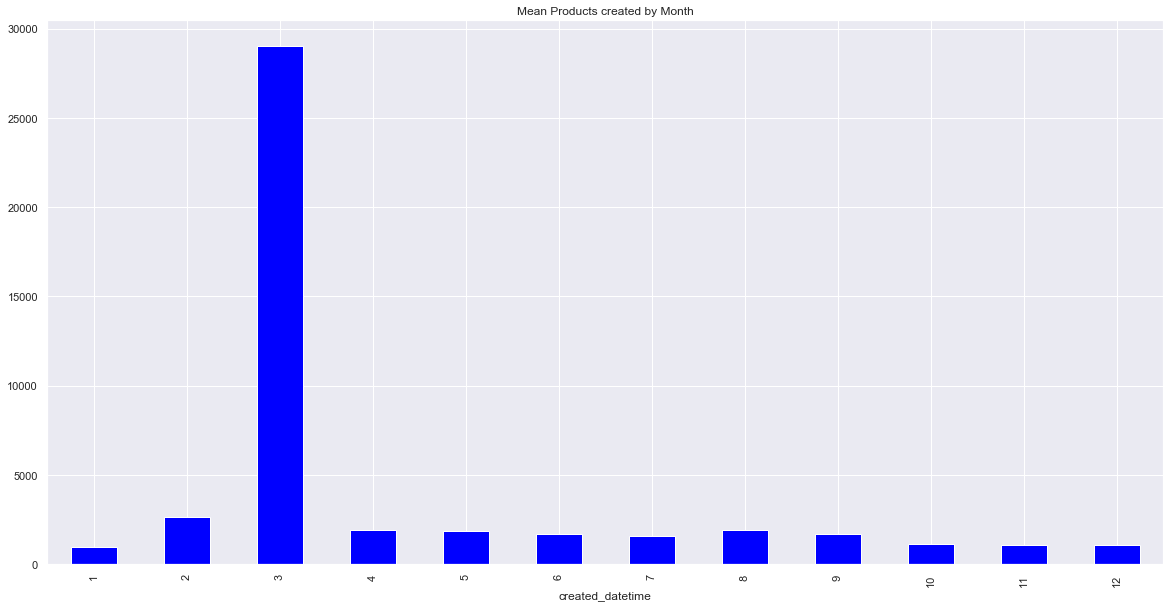

In [104]:
# Mean amount of Product created by month
mean_products_per_month.plot(kind='bar', figsize=(20,10), color='blue', title='Mean Products created by Month')

plt.show()

Since most of our data is from the same time period it doesn't make much sense to track the development of variables over time.

In [105]:
data.set_index('code', inplace=True)

### E. Build a database
We will build a database to hold the data. But first we need to rename some columns which may cause problems in this part of the exercise. 

In [106]:
# We rename all columns that contain a "-" since this is causing problems with the cursor
data = data.rename(columns={'nutrition-score_100g': 'nutrition_score_100g'})

In [107]:
# Creating an empty database
db = sqlite3.connect("my.db")

In [108]:
cursor = db.cursor()

In [109]:
query_1 = "CREATE TABLE nutrition (code TEXT PRIMARY KEY, carbohydrates_100g FLOAT, fat_100g FLOAT, proteins_100g FLOAT, nutrition_score_100g INT);"
query_2 = "CREATE TABLE energy (code TEXT PRIMARY KEY, energy_100g FLOAT, product_name FLOAT, sugars_100g FLOAT, additives_n INT);"

In [110]:
cursor.execute(query_1)
cursor.execute(query_2)

In [111]:
# We reduce our data to 1000 randomly selected rows and reset the index
data_sample = data.reset_index().sample(n=1000)

In [112]:
data_nutrition = data_sample[['code', 'carbohydrates_100g','fat_100g', 'proteins_100g', 'nutrition_score_100g']]

In [113]:
data_energy = data_sample[['code', 'energy_100g', 'product_name', 'sugars_100g', 'additives_n']]

In [114]:
data_nutrition.to_sql(name='nutrition',con=db,if_exists='append',index=False)

In [115]:
data_energy.to_sql(name='energy',con=db,if_exists='append',index=False)

Running a Query (Test)

In [116]:
def run_query(query):
    return pd.read_sql_query(query,db)

In [117]:
query ='''
SELECT carbohydrates_100g FROM nutrition
INNER JOIN energy
ON nutrition.code = energy.code
WHERE nutrition.nutrition_score_100g > 0
'''

In [118]:
run_query(query)

,carbohydrates_100g
0,16.60
1,1.70
2,6.32
3,56.00
4,29.00
...,...
634,58.62
635,7.14
636,43.75
637,100.00


### F. Finding correlations
We will try to find correlations between the different data fields. The goal is to identify the variables which most affect the nutritional score and provide some insight into which factors cause both a low or a high nutritional score.



In [119]:
data.corr(method = "pearson")

,index,additives_n,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin_a_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_100g
index,1.000000,-0.101499,0.013895,0.037060,0.031203,-0.005153,0.005043,-0.056026,-0.047286,0.031269,0.032808,-0.050689,-0.047080,0.001586,0.004707,0.015725,0.008071,-0.024621
additives_n,-0.101499,1.000000,0.000184,-0.107153,-0.041987,0.017760,-0.004537,0.161073,0.149523,-0.140001,-0.100430,-0.017669,-0.017027,-0.000529,0.006547,-0.005363,-0.003799,0.176385
energy_100g,0.013895,0.000184,1.000000,0.776271,0.571075,0.035510,0.006189,0.492566,0.324680,0.271593,0.282508,-0.082479,-0.076682,0.000628,-0.014426,0.021609,0.004430,0.649737
fat_100g,0.037060,-0.107153,0.776271,1.000000,0.694269,0.035794,0.022423,-0.097109,-0.055183,0.126217,0.223077,-0.047453,-0.043771,0.002323,-0.017021,0.033385,-0.001828,0.596036
saturated_fat_100g,0.031203,-0.041987,0.571075,0.694269,1.000000,0.019507,0.044748,-0.055955,0.103121,-0.006106,0.153429,-0.024396,-0.021268,0.006232,-0.013133,0.065749,-0.003826,0.645580
trans_fat_100g,-0.005153,0.017760,0.035510,0.035794,0.019507,1.000000,-0.000558,0.010130,0.005004,0.000509,-0.012480,0.001800,0.001261,-0.002099,-0.002183,-0.002538,0.003740,0.033011
cholesterol_100g,0.005043,-0.004537,0.006189,0.022423,0.044748,-0.000558,1.000000,-0.036460,-0.016930,-0.023856,0.047801,0.028104,0.057699,0.003712,-0.000990,0.010890,-0.000142,0.030994
carbohydrates_100g,-0.056026,0.161073,0.492566,-0.097109,-0.055955,0.010130,-0.036460,1.000000,0.672837,0.246564,-0.104413,-0.076444,-0.070585,-0.003969,-0.001977,-0.030206,0.008670,0.262484
sugars_100g,-0.047286,0.149523,0.324680,-0.055183,0.103121,0.005004,-0.016930,0.672837,1.000000,-0.017235,-0.267737,-0.084796,-0.073643,-0.014579,0.003956,-0.019616,0.007516,0.470981
fiber_100g,0.031269,-0.140001,0.271593,0.126217,-0.006106,0.000509,-0.023856,0.246564,-0.017235,1.000000,0.231346,-0.016529,-0.014490,0.045099,0.011528,0.004272,0.011386,-0.151289


In [120]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,index,additives_n,energy_100g,fat_100g,saturated_fat_100g,trans_fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin_a_100g,vitamin_c_100g,calcium_100g,iron_100g,nutrition_score_100g
index,1,-0.101499,0.0138951,0.0370597,0.0312034,-0.00515259,0.00504274,-0.0560257,-0.0472856,0.0312693,0.0328082,-0.050689,-0.0470805,0.00158639,0.00470698,0.0157253,0.00807145,-0.0246209
additives_n,-0.101499,1,0.000183929,-0.107153,-0.0419869,0.0177595,-0.00453684,0.161073,0.149523,-0.140001,-0.10043,-0.0176692,-0.0170273,-0.000528923,0.00654705,-0.00536314,-0.00379897,0.176385
energy_100g,0.0138951,0.000183929,1,0.776271,0.571075,0.0355099,0.00618853,0.492566,0.32468,0.271593,0.282508,-0.0824786,-0.076682,0.000628142,-0.0144261,0.0216092,0.0044298,0.649737
fat_100g,0.0370597,-0.107153,0.776271,1,0.694269,0.0357943,0.0224233,-0.0971094,-0.0551828,0.126217,0.223077,-0.0474532,-0.0437706,0.00232311,-0.0170212,0.033385,-0.0018283,0.596036
saturated_fat_100g,0.0312034,-0.0419869,0.571075,0.694269,1,0.0195074,0.0447478,-0.0559554,0.103121,-0.00610624,0.153429,-0.0243962,-0.0212676,0.00623155,-0.0131328,0.065749,-0.00382561,0.64558
trans_fat_100g,-0.00515259,0.0177595,0.0355099,0.0357943,0.0195074,1,-0.00055765,0.0101296,0.00500375,0.000508726,-0.0124802,0.00180048,0.00126056,-0.00209911,-0.00218257,-0.00253848,0.00374044,0.0330105
cholesterol_100g,0.00504274,-0.00453684,0.00618853,0.0224233,0.0447478,-0.00055765,1,-0.03646,-0.0169297,-0.0238561,0.0478007,0.0281045,0.0576992,0.00371177,-0.000990298,0.0108897,-0.000142414,0.0309941
carbohydrates_100g,-0.0560257,0.161073,0.492566,-0.0971094,-0.0559554,0.0101296,-0.03646,1,0.672837,0.246564,-0.104413,-0.0764444,-0.0705847,-0.00396857,-0.00197721,-0.030206,0.00867006,0.262484
sugars_100g,-0.0472856,0.149523,0.32468,-0.0551828,0.103121,0.00500375,-0.0169297,0.672837,1,-0.0172353,-0.267737,-0.0847964,-0.0736433,-0.0145791,0.00395566,-0.0196159,0.00751576,0.470981
fiber_100g,0.0312693,-0.140001,0.271593,0.126217,-0.00610624,0.000508726,-0.0238561,0.246564,-0.0172353,1,0.231346,-0.0165292,-0.0144897,0.045099,0.0115279,0.0042716,0.0113858,-0.151289


In [121]:
corr_matrix = data.corr().abs()

# The matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
highest_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
# The first element of the series is the pair with the bigest correlation. Note: here we just show the correlation between each variable!
highest_corr

salt_100g           sodium_100g             0.966286
energy_100g         fat_100g                0.776271
fat_100g            saturated_fat_100g      0.694269
carbohydrates_100g  sugars_100g             0.672837
energy_100g         nutrition_score_100g    0.649737
                                              ...   
trans_fat_100g      cholesterol_100g        0.000558
additives_n         vitamin_a_100g          0.000529
trans_fat_100g      fiber_100g              0.000509
additives_n         energy_100g             0.000184
cholesterol_100g    iron_100g               0.000142
Length: 153, dtype: float64

In [122]:
# Now let's check the correlation with the nutrition score.
print(corr_matrix["nutrition_score_100g"].sort_values(ascending=False))

nutrition_score_100g    1.000000
energy_100g             0.649737
saturated_fat_100g      0.645580
fat_100g                0.596036
sugars_100g             0.470981
carbohydrates_100g      0.262484
additives_n             0.176385
fiber_100g              0.151289
salt_100g               0.118874
sodium_100g             0.104556
proteins_100g           0.097748
calcium_100g            0.045939
trans_fat_100g          0.033011
cholesterol_100g        0.030994
index                   0.024621
vitamin_a_100g          0.023101
vitamin_c_100g          0.012653
iron_100g               0.001496
Name: nutrition_score_100g, dtype: float64


In [ ]:
# We can create scatter matrices to easily visualise any trends in our data.
from pandas.plotting import scatter_matrix
# Let's choose only the variables with a correlation >= 0.5 (more or less)
params=['nutrition_score_100g','saturated_fat_100g','energy_100g','fat_100g','sugars_100g']
# Instead of having histograms on the diagonals to display density, we could view the more aesthetically pleasing kernel density estimation(KDE).
scatter_matrix(data[params], alpha=1, figsize=(10, 10), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a73b5eb10>,
      dtype=object)